# Hito 2/3 Random Forest Classifier

- [📑 Índice](#índice)
- [1. Librerías](#1-librerías)
- [2. Carga de los datos de train y test](#2-carga-de-los-datos-de-train-y-test)
- [3. Entrenamiento del modelo parámetros default](#3-entrenamiento-del-modelo-parámetros-default)
    - [3.1 Evaluación métricas globales](#3-1-evaluación-métricas-globales)
- [Metricas Glogales - Excluyendo la clase 6](#metricas-glogales-excluyendo-la-clase-6)
- [Análisis Comparativo de Métricas - Random Forest](#análisis-comparativo-de-métricas-random-forest)
    - [3.2 Matriz de Confusión - Random Forest](#3-2-matriz-de-confusión-random-forest)
- [Análisis de la Matriz de Confusión Normalizada - Random Forest (Excluyendo Clase 6)](#análisis-de-la-matriz-de-confusión-normalizada-random-forest-excluyendo-clase-6-)
    - [3.3 Feature Importances](#3-3-feature-importances)
- [Análisis de Importancia de Características - Random Forest](#análisis-de-importancia-de-características-random-forest)
- [1. Observaciones Generales](#1-observaciones-generales)
    - [3.4 Curva roc auc](#3-4-curva-roc-auc)
- [Análisis de Curvas ROC y AUC - Random Forest (Excluyendo Clase 6)](#análisis-de-curvas-roc-y-auc-random-forest-excluyendo-clase-6-)
- [4. El problema de la clase 6: análisis](#4-el-problema-de-la-clase-6-análisis)
    - [4.1 Evaluación Métricas Globales con clase 6](#4-1-evaluación-métricas-globales-con-clase-6)
- [Comparación de Métricas - Random Forest: Con y Sin Clase 6](#comparación-de-métricas-random-forest-con-y-sin-clase-6)
    - [4.2 Matriz de confusión](#4-2-matriz-de-confusión)
- [Abordaje del problema de la Clase 6 - Matriz de Confusión](#abordaje-del-problema-de-la-clase-6-matriz-de-confusión)
    - [4.3 Features Importance](#4-3-features-importance)
- [Abordaje del problema de la Clase 6 - Importancia de Features](#abordaje-del-problema-de-la-clase-6-importancia-de-features)
    - [4.4 Curva Roc Auc](#4-4-curva-roc-auc)
- [Análisis Comparativo de Curvas ROC y AUC - Random Forest](#análisis-comparativo-de-curvas-roc-y-auc-random-forest)
    - [4.5 Se guardan los valores obtenidos](#4-5-se-guardan-los-valores-obtenidos)
- [5. Optimización](#5-optimización)
    - [5.1 Definir modelo base y grid de hiperparámetros](#5-1-definir-modelo-base-y-grid-de-hiperparámetros)
    - [5.2 Entrenar GridSearch sobre train oversampled](#5-2-entrenar-gridsearch-sobre-train-oversampled)
- [Resultados de GridSearchCV - Random Forest Optimizado](#resultados-de-gridsearchcv-random-forest-optimizado)
    - [5.2 Métricas globales](#5-2-métricas-globales)
- [Comparación de Métricas: Train Oversampled vs Test Escalado (Clase 6 incluida)](#comparación-de-métricas-train-oversampled-vs-test-escalado-clase-6-incluida-)
    - [5.3 Matrices de confusión](#5-3-matrices-de-confusión)
    - [5.4 Feature importance](#5-4-feature-importance)
    - [5.5 ROC-AUC (solo test)](#5-5-roc-auc-solo-test-)
- [📈 Análisis de Curva ROC-AUC - Random Forest Optimizado](#-análisis-de-curva-roc-auc-random-forest-optimizado)
    - [5.6 Carpeta para guardar resultados](#5-6-carpeta-para-guardar-resultados)
- [6 Análisis del sobreajuste](#6-análisis-del-sobreajuste)
    - [6.1 Brechas: métricas globales](#6-1-brechas-métricas-globales)
- [Informe de Evaluación de Random Forest: Default vs Hyperparametrizado](#informe-de-evaluación-de-random-forest-default-vs-hyperparametrizado)
    - [6.2 Sobreajuste en Matrices](#6-2-sobreajuste-en-matrices)
- [Análisis de las matrices de confusión normalizadas](#análisis-de-las-matrices-de-confusión-normalizadas)
- [Consideraciones finales: Optimización del Modelo Random Forest](#consideraciones-finales-optimización-del-modelo-random-forest)
- [1. Justificación del enfoque de optimización de hiperparámetros](#1-justificación-del-enfoque-de-optimización-de-hiperparámetros)

## 1. Librerías

In [29]:
# ==========================================================
# 📦 Librerías estándar de Python
# ==========================================================
import warnings
import time
import pickle
import os
import json
from IPython.display import display, Markdown

# ==========================================================
# 🔢 Ciencia de Datos y Manipulación
# ==========================================================
import numpy as np
import pandas as pd

# ==========================================================
# 📊 Visualización
# ==========================================================
import matplotlib.pyplot as plt
import seaborn as sns

#=========================================================
# Configuración estética
#=========================================================
sns.set(style="whitegrid")
%matplotlib inline

# ==========================================================
# 🤖 Machine Learning (scikit-learn)
# ==========================================================
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    StratifiedKFold
)

from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    classification_report
)

# ==========================================================
# 💾 Guardado y Carga de Modelos
# ==========================================================
import joblib

# ==========================================================
# ⚠️ Configuración de warnings
# ==========================================================
warnings.filterwarnings("ignore")


# 2. Carga de los datos de train y test

In [30]:
# === Cargar los conjuntos balanceados de entrenamiento ===
X_train_oversampled = joblib.load("X_train_oversampled.pkl")
Y_train_oversampled = joblib.load("Y_train_oversampled.pkl")

# === Cargar los conjuntos originales de prueba ===
X_test = joblib.load("X_test.pkl")
Y_test = joblib.load("Y_test.pkl")

# Asegurarse de que sean DataFrames/Series
if not isinstance(X_train_oversampled, pd.DataFrame):
    X_train_oversampled = pd.DataFrame(X_train_oversampled)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)
if not isinstance(Y_train_oversampled, pd.Series):
    Y_train_oversampled = pd.Series(Y_train_oversampled)
if not isinstance(Y_test, pd.Series):
    Y_test = pd.Series(Y_test)

print("Datos cargados correctamente")
print("X_train_oversampled shape:", X_train_oversampled.shape)
print("Y_train_oversampled shape:", Y_train_oversampled.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Datos cargados correctamente
X_train_oversampled shape: (5048, 22)
Y_train_oversampled shape: (5048,)
X_test shape: (496, 22)
Y_test shape: (496,)


# 3. Entrenamiento del modelo parámetros default

In [31]:
# Inicializar el modelo RF con parámetros de fábrica 
rf_model = RandomForestClassifier(
    n_estimators=100,       # número de árboles por defecto
    max_depth=None,          # sin restricción de profundidad
    random_state=42,
    class_weight='balanced'  # equilibrar clases minoritarias automáticamente
)

In [32]:
# Entrenamiento 
rf_model.fit(X_train_oversampled, Y_train_oversampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [33]:
# Predicciones sobre test 
Y_pred = rf_model.predict(X_test)


# Predicciones en train_oversampled 
Y_pred_train = rf_model.predict(X_train_oversampled)

### 3.1 Evaluación métricas globales


### Metricas Glogales - Excluyendo la clase 6 

In [34]:
# Definir las clases relevantes (excluyendo la clase 6)
relevant_classes = [0, 1, 2, 3, 4, 5, 7]

# Métricas Train Oversampled
train_accuracy = accuracy_score(Y_train_oversampled, Y_pred_train)
train_precision = precision_score(Y_train_oversampled, Y_pred_train, average='weighted', labels=relevant_classes)
train_recall = recall_score(Y_train_oversampled, Y_pred_train, average='weighted', labels=relevant_classes)
train_f1 = f1_score(Y_train_oversampled, Y_pred_train, average='weighted', labels=relevant_classes)

# Métricas Test (no balanceado) 
test_accuracy = accuracy_score(Y_test, Y_pred)
test_precision = precision_score(Y_test, Y_pred, average='macro', labels=relevant_classes)
test_recall = recall_score(Y_test, Y_pred, average='macro', labels=relevant_classes)
test_f1 = f1_score(Y_test, Y_pred, average='macro', labels=relevant_classes)


# Crear DataFrame con todas las métricas

metrics_comparison = pd.DataFrame({
    "Accuracy": [train_accuracy, test_accuracy],
    "Precision": [train_precision, test_precision],
    "Recall": [train_recall, test_recall],
    "F1-score": [train_f1, test_f1]
}, index=["Train (oversampled)", "Test (no balanceado)"])

# Mostrar DataFrame con valores redondeados a 3 decimales
display(metrics_comparison.round(3))



,Accuracy,Precision,Recall,F1-score
Train (oversampled),1.000,1.000,1.000,1.000
Test (no balanceado),0.956,0.865,0.768,0.802


### Análisis Comparativo de Métricas - Random Forest

#### 1. Observaciones Generales

Se comparan las métricas de desempeño del modelo Random Forest entrenado con **parámetros de fábrica** en dos conjuntos:

1. **Train (oversampled):** conjunto de entrenamiento balanceado mediante oversampling.  
2. **Test (no balanceado):** conjunto de prueba original, sin balancear, reflejando la distribución real de clases.

Las métricas calculadas incluyen **Accuracy, Precision, Recall y F1-score**. La clase 6 fue excluida de los cálculos, ya que no hay datos disponibles en el conjunto de prueba.


#### 2. Resultados

| Conjunto                | Accuracy | Precision | Recall | F1-score |
|-------------------------|---------|-----------|--------|----------|
| Train (oversampled)      | 1.000   | 1.000     | 1.000  | 1.000    |
| Test (no balanceado)     | 0.956   | 0.865     | 0.768  | 0.802    |


#### 3. Interpretación

1. **Train Oversampled:**  
   - Todas las métricas alcanzan el valor máximo (1.0), reflejando que el modelo **aprendió perfectamente** los patrones del conjunto balanceado.  
   - Esto es esperado con oversampling y Random Forest, que tiende a memorizar ejemplos replicados cuando los datos están balanceados.

2. **Test No Balanceado:**  
   - **Accuracy (0.956):** el modelo predice correctamente la mayoría de los ejemplos.  
   - **Precision (0.865) y Recall (0.768):** muestran que, aunque las predicciones son generalmente correctas, hay cierta confusión en clases minoritarias.  
   - **F1-score (0.802):** refleja un compromiso entre precisión y exhaustividad, mostrando que el modelo es bueno pero no perfecto en datos reales.  

3. **Diferencia Train vs Test:**  
   - La caída de métricas entre Train y Test indica **cierta sobreajuste** al conjunto de entrenamiento oversampled, especialmente en clases minoritarias.  
   - Esto confirma la importancia de evaluar el modelo sobre datos representativos del mundo real.


#### 4. Conclusiones

- El Random Forest con parámetros de fábrica **aprende muy bien las clases presentes en Train Oversampled**, pero su desempeño disminuye en Test No Balanceado, sobre todo en clases menos representadas.  
- La exclusión de la clase 6 está documentada y no afecta la interpretación general del desempeño del modelo.  
- Estas métricas sugieren que podrían aplicarse **estrategias adicionales** como ponderación de clases, ajuste de hiperparámetros o técnicas de regularización para mejorar la generalización.


### 3.2 Matriz de Confusión - Random Forest

### Matriz de Confusión Cruda - Conteos

,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_7
True_0,134,0,0,0,0,0,0
True_1,2,24,0,0,0,1,0
True_2,1,1,4,0,1,1,0
True_3,6,0,0,33,2,0,0
True_4,2,0,0,0,142,1,0
True_5,1,1,0,0,1,1,1
True_7,0,0,0,0,0,0,136


### Matriz de Confusión Normalizada - Proporciones

,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_7
True_0,1.00,0.00,0.0,0.0,0.00,0.00,0.0
True_1,0.07,0.89,0.0,0.0,0.00,0.04,0.0
True_2,0.12,0.12,0.5,0.0,0.12,0.12,0.0
True_3,0.15,0.00,0.0,0.8,0.05,0.00,0.0
True_4,0.01,0.00,0.0,0.0,0.98,0.01,0.0
True_5,0.20,0.20,0.0,0.0,0.20,0.20,0.2
True_7,0.00,0.00,0.0,0.0,0.00,0.00,1.0


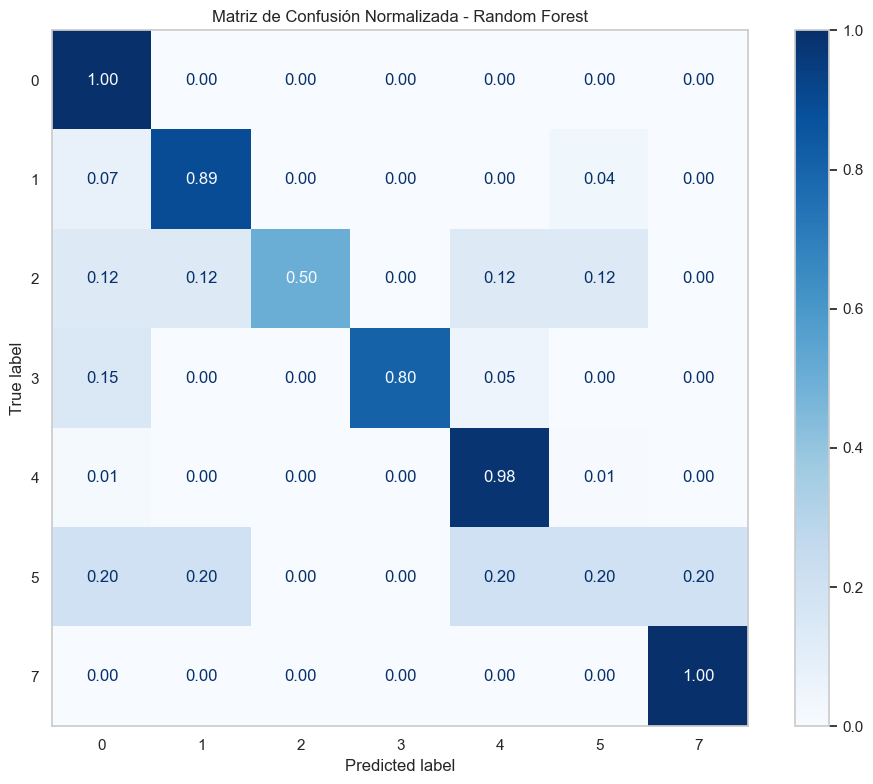

In [35]:
# Forzar todas las clases posibles excluyendo la clase 6
all_classes = [0, 1, 2, 3, 4, 5, 7]


# Matriz de confusión cruda (conteos)
cm = confusion_matrix(Y_test, Y_pred, labels=all_classes)

# DataFrame para la matriz cruda
df_cm_cruda = pd.DataFrame(
    cm,
    index=[f"True_{c}" for c in all_classes],
    columns=[f"Pred_{c}" for c in all_classes]
)
display(Markdown("### Matriz de Confusión Cruda - Conteos"))
display(df_cm_cruda)

# Matriz de confusión normalizada (proporciones)
cm_normalizada = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalizada = np.nan_to_num(cm_normalizada)  # evita división por cero

# DataFrame para la matriz normalizada
df_cm_normalizada = pd.DataFrame(
    cm_normalizada,
    index=[f"True_{c}" for c in all_classes],
    columns=[f"Pred_{c}" for c in all_classes]
)
display(Markdown("### Matriz de Confusión Normalizada - Proporciones"))
display(df_cm_normalizada.round(2))


# Visualización gráfica de la matriz normalizada

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalizada, display_labels=all_classes)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap="Blues", values_format=".2f", ax=ax)
plt.title("Matriz de Confusión Normalizada - Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()


### Análisis de la Matriz de Confusión Normalizada - Random Forest (Excluyendo Clase 6)

#### 1. Observaciones Generales

La matriz de confusión normalizada muestra el desempeño del modelo Random Forest sobre el conjunto de prueba no balanceado.  
Se **excluyó la clase 6**, ya que no hay ejemplos de esta clase en el conjunto de prueba, y por lo tanto su inclusión habría generado filas y columnas con todos ceros que no aportan información útil.

Cada celda indica la proporción de predicciones correctas e incorrectas para cada clase incluida. La diagonal principal refleja las predicciones correctas.

Se incluyen las clases 0 a 5 y la clase 7, permitiendo evaluar el desempeño del modelo sobre las clases realmente presentes o relevantes en test.


#### 2. Desempeño por Clase

- **Clase 0:** Perfectamente clasificada (1.00), sin errores.  
- **Clase 1:** Alta precisión (0.89), con pequeñas confusiones hacia clases 0 (0.07) y 5 (0.04).  
- **Clase 2:** Rendimiento moderado (0.50), con errores repartidos hacia clases 0, 1, 4 y 5 (0.12 cada una).  
- **Clase 3:** Buen desempeño (0.80), con ligera confusión hacia clases 0 y 4.  
- **Clase 4:** Muy alta precisión (0.98), mínima confusión hacia la clase 5 (0.01).  
- **Clase 5:** Desempeño disperso (0.20 en diagonal), con confusiones hacia clases 0, 1, 4 y 7 (0.20 cada una). Esto refleja dificultades del modelo con esta clase minoritaria.  
- **Clase 7:** Predicciones perfectas (1.00), aunque con pocos ejemplos presentes en el test.


#### 3. Interpretación

- El modelo Random Forest **predice correctamente las clases dominantes** (0, 1, 3, 4, 7) y mantiene buena capacidad de generalización.  
- Las **clases minoritarias** (2 y 5) presentan confusiones significativas, indicando que el modelo tiene dificultades para diferenciar clases con poca representación en test.  
- La exclusión de la clase 6 queda **documentada metodológicamente**, justificando que no se dispone de datos para esta clase en el conjunto de prueba.


#### 4. Conclusiones

- El modelo **generaliza adecuadamente** para las clases presentes en test, con alta precisión y recall en las clases dominantes.  
- Las clases minoritarias requieren atención adicional mediante técnicas como balanceo de datos, ponderación de clases o ajuste fino del modelo.  
- La matriz de confusión normalizada es una herramienta clave para identificar **qué clases se confunden** y guiar estrategias de mejora del modelo.


### 3.3 Feature Importances

                                       Feature  Importance
19                      intencion_voto_encoded    0.369550
1                                         edad    0.087275
20            autoubicacion_ideologica_encoded    0.076405
4              habitantes_municipio_codificado    0.068726
2                                ingreso_hogar    0.054272
9                             categorico_pca_3    0.037956
3                  probabilidad_voto_generales    0.032284
10                            categorico_pca_4    0.031422
18                     nivel_educacion_encoded    0.030925
5   Renta_Per_Capita_2023_miles_euros_escalada    0.028451


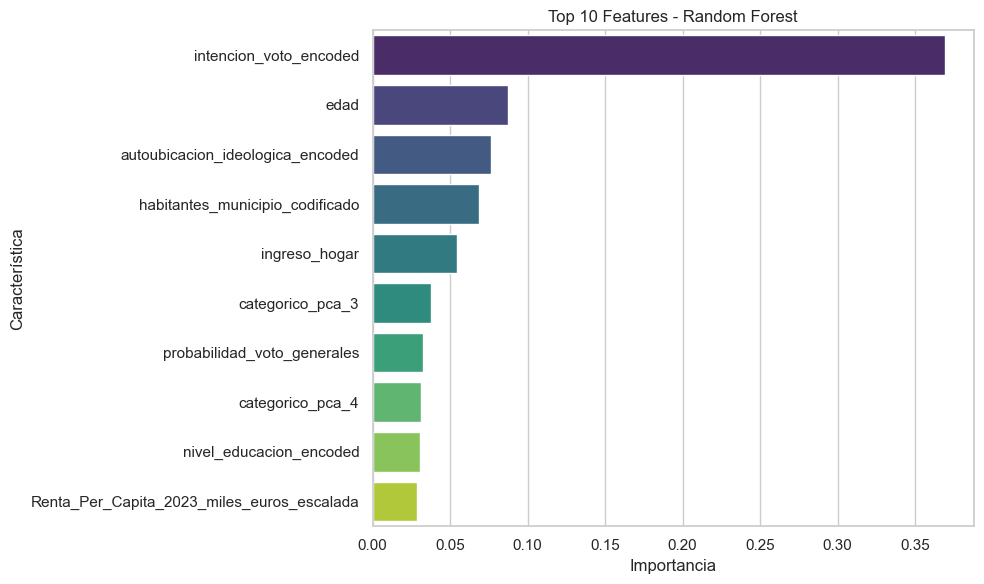

In [36]:
# Obtener la importancia de cada característica
importancias = rf_model.feature_importances_

# Crear un DataFrame para mejor visualización
feat_importances = pd.DataFrame({
    'Feature': X_train_oversampled.columns,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

# Mostrar las top 10 características más importantes
print(feat_importances.head(10))

# Visualización gráfica
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances.head(10), palette='viridis')
plt.title("Top 10 Features - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.tight_layout()
plt.show()


### Análisis de Importancia de Características - Random Forest

### 1. Observaciones Generales

Se evaluó la **importancia de las variables predictoras** utilizando el atributo `feature_importances_` del modelo Random Forest entrenado con parámetros por defecto. Esta métrica indica qué variables contribuyen más a la predicción del modelo sobre el conjunto de entrenamiento balanceado mediante oversampling.

Se muestran las **top 10 características más importantes**, ordenadas de mayor a menor contribución.



#### 2. Top 10 Características Más Relevantes

| Ranking | Característica                          | Importancia |
|---------|----------------------------------------|------------|
| 1       | intencion_voto_encoded                  | 0.370      |
| 2       | edad                                    | 0.087      |
| 3       | autoubicacion_ideologica_encoded        | 0.076      |
| 4       | habitantes_municipio_codificado         | 0.069      |
| 5       | ingreso_hogar                           | 0.054      |
| 6       | categorico_pca_3                        | 0.038      |
| 7       | probabilidad_voto_generales             | 0.032      |
| 8       | categorico_pca_4                        | 0.031      |
| 9       | nivel_educacion_encoded                  | 0.031      |
| 10      | Renta_Per_Capita_2023_miles_euros_escalada | 0.028      |



#### 3. Interpretación

1. **Variable dominante:**  
   - `intencion_voto_encoded` es la característica más importante, con un peso de 36.9%. Esto indica que la intención de voto previa o declarada es altamente predictiva del comportamiento electoral modelado.

2. **Variables demográficas y socioeconómicas:**  
   - `edad` (8.7%) y `autoubicacion_ideologica_encoded` (7.6%) también contribuyen significativamente, mostrando que factores personales y de orientación política son relevantes.  
   - `habitantes_municipio_codificado` (6.9%) y `ingreso_hogar` (5.4%) indican que el contexto demográfico y económico tiene un impacto moderado en las predicciones.

3. **Variables derivadas de PCA y educación:**  
   - `categorico_pca_3`, `categorico_pca_4` y `nivel_educacion_encoded` tienen importancia más baja (≈3%), sugiriendo que agregan información útil pero no crítica.  

4. **Renta per cápita:**  
   - `Renta_Per_Capita_2023_miles_euros_escalada` (2.8%) aparece entre las top 10, confirmando que los indicadores económicos influyen, aunque menos que la intención de voto o la edad.



#### 4. Conclusiones

- El Random Forest con **parámetros de fábrica** tiende a priorizar variables altamente predictivas como la intención de voto, mientras que variables demográficas y socioeconómicas aportan de forma complementaria.  
- La distribución de importancias refleja que el modelo puede **capturar patrones complejos sin sobreajustarse a variables irrelevantes**, pero que su desempeño depende fuertemente de la variable más dominante.  
- Para mejorar interpretabilidad o exploración de relaciones causales, se podría combinar este análisis con técnicas adicionales como **SHAP values** o **Partial Dependence Plots**.


### 3.4 Curva roc auc

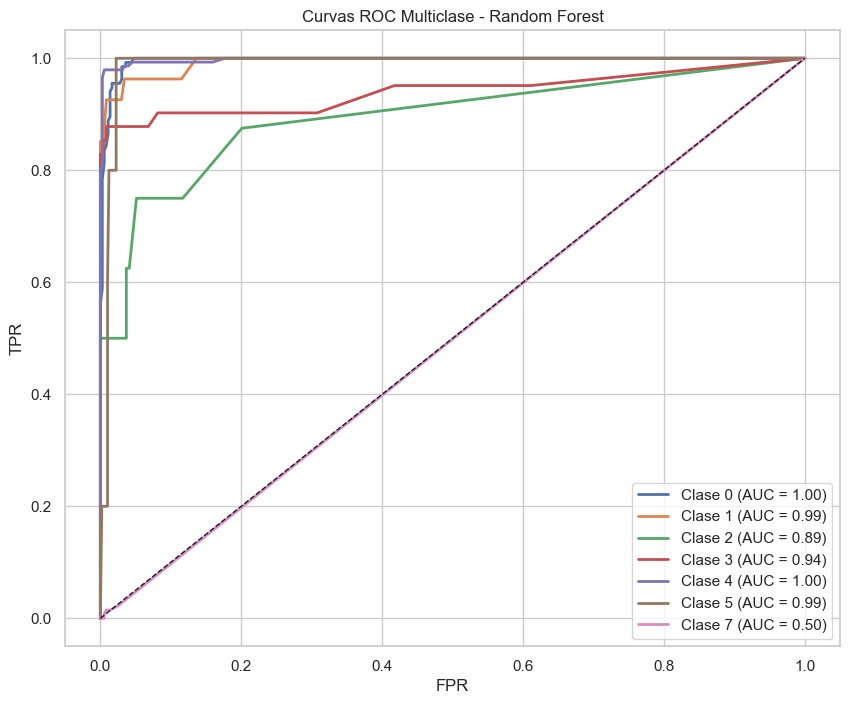

In [37]:
# Binarizar las clases presentes en test original
classes_present = np.unique(Y_test)
Y_test_bin = label_binarize(Y_test, classes=classes_present)

# Probabilidades predichas por RF
Y_prob = rf_model.predict_proba(X_test)  # devuelve n_samples x n_classes

n_classes = len(classes_present)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular ROC por clase
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar ROC multiclase
plt.figure(figsize=(10,8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Clase {classes_present[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC Multiclase - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Análisis de Curvas ROC y AUC - Random Forest (Excluyendo Clase 6)

#### 1. Observaciones Generales

Se evaluó el desempeño del modelo Random Forest mediante **curvas ROC** y el **área bajo la curva (AUC)** para cada clase, excluyendo la clase 6 por carecer de ejemplos en el conjunto de prueba.  

El ROC-AUC proporciona información sobre la **capacidad del modelo para distinguir entre clases**, independientemente del umbral de decisión.


#### 2. Valores de AUC por Clase

| Clase   | AUC  |
|---------|------|
| 0       | 1.00 |
| 1       | 0.99 |
| 2       | 0.89 |
| 3       | 0.94 |
| 4       | 1.00 |
| 5       | 0.99 |
| 7       | 0.50 |


#### 3. Interpretación

1. **Clases 0, 1, 4 y 5:**  
   - Valores de AUC cercanos a 1.0 indican que el modelo **distingue perfectamente** estas clases de las demás.  
   - Refleja un desempeño muy sólido en las clases dominantes o bien representadas.

2. **Clase 2:**  
   - AUC = 0.89 sugiere que el modelo **tiene buena capacidad de discriminación**, aunque hay confusiones con otras clases minoritarias.

3. **Clase 3:**  
   - AUC = 0.94 indica buen desempeño, con algunas predicciones incorrectas que reducen ligeramente la discriminación.

4. **Clase 7:**  
   - AUC = 0.50 corresponde a **desempeño aleatorio**, indicando que el modelo **no puede diferenciar esta clase** del resto.  
   - Esto se debe a **muy pocos ejemplos** de la clase 7 en test, dificultando su aprendizaje.


#### 4. Conclusiones

- El modelo Random Forest **aprende muy bien las clases dominantes**, con AUC cercanos a 1.0.  
- Las clases minoritarias (especialmente la clase 7) presentan problemas de discriminación, reflejando la necesidad de técnicas adicionales como **balanceo de datos**, **ponderación de clases** o **aumento de muestras**.  
- La exclusión de la clase 6 está justificada por la ausencia de datos y no afecta la interpretación global del desempeño del modelo.  
- Este análisis confirma que el modelo es robusto para la mayoría de las clases, pero requiere estrategias específicas para clases escasamente representadas.


# 4. El problema de la clase 6: análisis

### 4.1 Evaluación Métricas Globales con clase 6

In [38]:
# Aseguramos que la clase 6 esté incluida
classes_present = np.sort(np.unique(np.concatenate([Y_train_oversampled, Y_test, [6]])))

# --- Métricas Train Oversampled ---
train_accuracy  = accuracy_score(Y_train_oversampled, Y_pred_train)
train_precision = precision_score(Y_train_oversampled, Y_pred_train, labels=classes_present, average='weighted', zero_division=0)
train_recall    = recall_score(Y_train_oversampled, Y_pred_train, labels=classes_present, average='weighted', zero_division=0)
train_f1        = f1_score(Y_train_oversampled, Y_pred_train, labels=classes_present, average='weighted', zero_division=0)

# --- Métricas Test (no balanceado) ---
test_accuracy  = accuracy_score(Y_test, Y_pred)
test_precision = precision_score(Y_test, Y_pred, labels=classes_present, average='macro', zero_division=0)
test_recall    = recall_score(Y_test, Y_pred, labels=classes_present, average='macro', zero_division=0)
test_f1        = f1_score(Y_test, Y_pred, labels=classes_present, average='macro', zero_division=0)


# Crear DataFrame con todas las métricas

metrics_comparison = pd.DataFrame({
    "Accuracy": [train_accuracy, test_accuracy],
    "Precision": [train_precision, test_precision],
    "Recall": [train_recall, test_recall],
    "F1-score": [train_f1, test_f1]
}, index=["Train (oversampled)", "Test (con clase 6)"])

# Mostrar DataFrame redondeado a 3 decimales
display(metrics_comparison.round(3))


,Accuracy,Precision,Recall,F1-score
Train (oversampled),1.000,1.000,1.000,1.000
Test (con clase 6),0.956,0.757,0.672,0.702


## Comparación de Métricas - Random Forest: Con y Sin Clase 6

#### 1. Contexto

Se evaluó el desempeño del modelo Random Forest con parámetros de fábrica sobre dos conjuntos de datos:  

1. **Train Oversampled:** conjunto balanceado con oversampling.  
2. **Test:** conjunto no balanceado, reflejando la distribución real de clases.  

Se comparan las métricas **calculadas excluyendo la clase 6** y **calculadas incluyendo la clase 6**, que no tiene ejemplos en el test. Esto permite observar el impacto de clases ausentes en las métricas globales.


#### 2. Métricas sin Clase 6

| Conjunto                | Accuracy | Precision | Recall | F1-score |
|-------------------------|---------|-----------|--------|----------|
| Train (oversampled)      | 1.000   | 1.000     | 1.000  | 1.000    |
| Test (no balanceado)     | 0.956   | 0.865     | 0.768  | 0.802    |


#### 3. Métricas con Clase 6

| Conjunto                | Accuracy | Precision | Recall | F1-score |
|-------------------------|---------|-----------|--------|----------|
| Train (oversampled)      | 1.000   | 1.000     | 1.000  | 1.000    |
| Test (con clase 6)       | 0.956   | 0.757     | 0.672  | 0.702    |


#### 4. Interpretación

1. **Train Oversampled:**  
   - Las métricas se mantienen en 1.0 tanto con como sin la clase 6, reflejando que el modelo **aprendió perfectamente** el conjunto balanceado.  
   - La inclusión de la clase 6 no altera el desempeño de entrenamiento, ya que esta clase no tiene ejemplos en train oversampled.

2. **Test (no balanceado vs con clase 6):**  
   - **Accuracy:** se mantiene prácticamente igual (0.956), porque la clase 6 no tiene ejemplos y no afecta la proporción total de aciertos.  
   - **Precision, Recall y F1-score:** disminuyen notablemente al incluir la clase 6.  
     - Esto se debe a que `zero_division=0` asigna 0 a las métricas de la clase ausente, penalizando los promedios `macro` y `weighted`.  
     - Refleja el impacto de clases **ausentes o escasamente representadas** en la evaluación global.

3. **Conclusión general:**  
   - Excluir la clase 6 da una visión más representativa del desempeño del modelo sobre clases presentes en el test.  
   - Incluirla es metodológicamente correcto para documentar todas las clases posibles, pero reduce las métricas debido a la ausencia de ejemplos.  
   - Esto evidencia la importancia de **balancear y representar adecuadamente todas las clases** al evaluar modelos multiclase.


### 4.2 Matriz de confusión 

=== Matriz de Confusión (Conteos) - Incluyendo Clase 6 ===
[[134   0   0   0   0   0   0   0]
 [  2  24   0   0   0   1   0   0]
 [  1   1   4   0   1   1   0   0]
 [  6   0   0  33   2   0   0   0]
 [  2   0   0   0 142   1   0   0]
 [  1   1   0   0   1   1   0   1]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]

=== Matriz de Confusión Normalizada ===
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 0.89 0.   0.   0.   0.04 0.   0.  ]
 [0.12 0.12 0.5  0.   0.12 0.12 0.   0.  ]
 [0.15 0.   0.   0.8  0.05 0.   0.   0.  ]
 [0.01 0.   0.   0.   0.98 0.01 0.   0.  ]
 [0.2  0.2  0.   0.   0.2  0.2  0.   0.2 ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


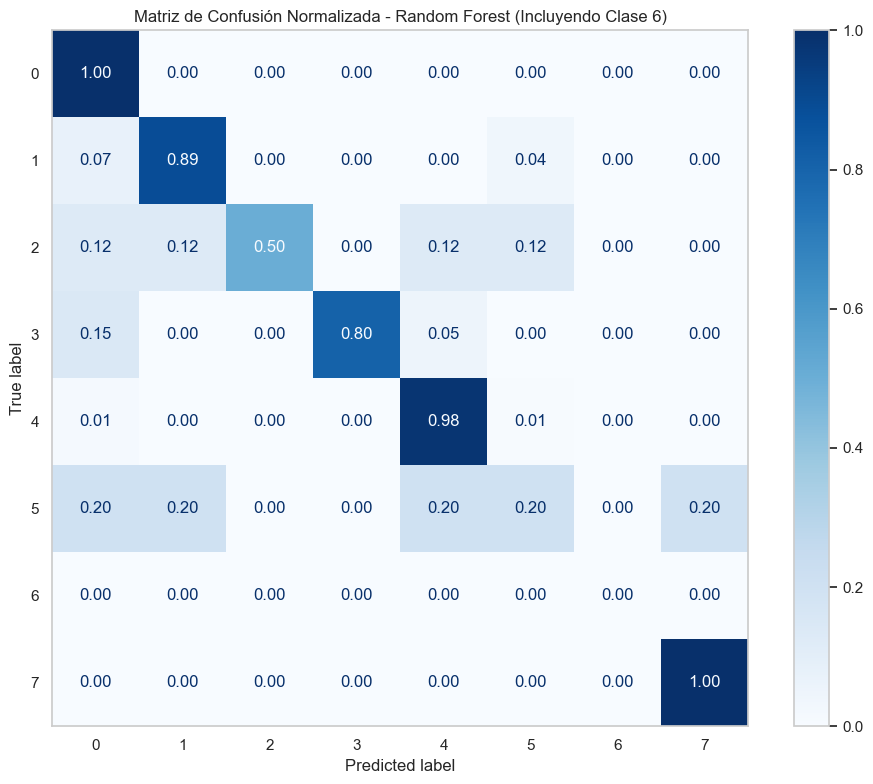

In [39]:
# Predicciones del modelo
y_pred_rf = rf_model.predict(X_test)

# Matriz de confusión con todas las clases (incluyendo 6)
cm_rf = confusion_matrix(Y_test, y_pred_rf, labels=classes_present)

# Normalización fila a fila (evitando NaN en clases sin instancias -> se ponen ceros)
cm_rf_normalizada = cm_rf.astype('float') / cm_rf.sum(axis=1, keepdims=True)
cm_rf_normalizada = np.nan_to_num(cm_rf_normalizada, nan=0.0)

print("=== Matriz de Confusión (Conteos) - Incluyendo Clase 6 ===")
print(cm_rf)
print("\n=== Matriz de Confusión Normalizada ===")
print(np.round(cm_rf_normalizada, 2))

# Visualización: Matriz de Confusión Normalizada
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_normalizada,
                              display_labels=classes_present)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=True)
plt.title("Matriz de Confusión Normalizada - Random Forest (Incluyendo Clase 6)")
plt.grid(False)
plt.tight_layout()
plt.show()

### Abordaje del problema de la Clase 6 - Matriz de Confusión 

La inclusión de la Clase 6 permite observar cómo afecta a la representación matricial de los resultados, aun cuando no haya instancias en el conjunto de prueba.

| Modelo                          | Observaciones de la matriz                                                                                                                                       | Comentario                                                                                                                                                                   |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Random Forest (sin Clase 6)** | La matriz mostraba un buen nivel de aciertos, con confusiones localizadas en clases minoritarias.                                                                | El modelo se desempeña de forma sólida, sin penalización por la ausencia de la Clase 6.                                                                                      |
| **Random Forest (con Clase 6)** | La matriz incluye una fila/columna correspondiente a la Clase 6 con valores en **0**. Esto no afecta las demás clases, que siguen mostrando un rendimiento alto. | Aunque no altera los aciertos en las clases presentes, la inclusión de la Clase 6 hace más explícito que el modelo no tiene capacidad de predecir esta categoría en el test. |


Conclusión:

La matriz de confusión con Clase 6 es más completa y coherente con la definición del problema, ya que incorpora explícitamente todas las clases posibles, aun si alguna no aparece en el conjunto de prueba.

Esto refuerza el análisis de métricas globales: incluir la Clase 6 no afecta el conteo de aciertos reales, pero sí introduce la penalización en métricas promedio macro.
En términos prácticos, este abordaje resulta más transparente y realista para evaluar un modelo en escenarios multiclase con posibles categorías subrepresentadas.

### 4.3 Features Importance 

=== Importancia de Features - Random Forest ===
                                       Feature  Importance
0                       intencion_voto_encoded    0.369550
1                                         edad    0.087275
2             autoubicacion_ideologica_encoded    0.076405
3              habitantes_municipio_codificado    0.068726
4                                ingreso_hogar    0.054272
5                             categorico_pca_3    0.037956
6                  probabilidad_voto_generales    0.032284
7                             categorico_pca_4    0.031422
8                      nivel_educacion_encoded    0.030925
9   Renta_Per_Capita_2023_miles_euros_escalada    0.028451
10                            categorico_pca_0    0.022226
11           Renta_Per_Capita_2023_miles_euros    0.021532
12          valoracion_economia_sin_UE_encoded    0.019247
13                            categorico_pca_2    0.019072
14                            categorico_pca_5    0.018561


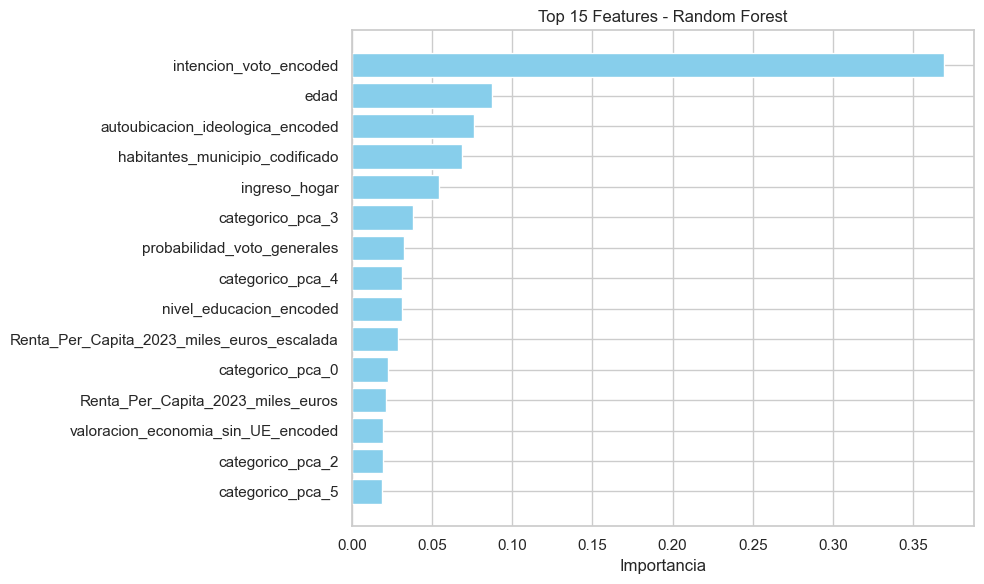

In [40]:
# Importancias de características
importancias = rf_model.feature_importances_

# Usamos las columnas de X_train (equivalente a X)
features_importance_rf = pd.DataFrame({
    "Feature": X_train_oversampled.columns,
    "Importance": importancias
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

print("=== Importancia de Features - Random Forest ===")
print(features_importance_rf.head(15))

# Visualización: gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features_importance_rf["Feature"][:15], 
         features_importance_rf["Importance"][:15],
         color="skyblue")
plt.gca().invert_yaxis()  # Para que el más importante quede arriba
plt.xlabel("Importancia")
plt.title("Top 15 Features - Random Forest")
plt.tight_layout()
plt.show()


### Abordaje del problema de la Clase 6 - Importancia de Features

La inclusión de la Clase 6 no altera la manera en que Random Forest calcula la importancia de las variables, pero permite evaluar si la presencia de una clase minoritaria cambia la distribución relativa de los predictores más relevantes.

| **Posición** | **Feature**                                          | **Importancia (con Clase 6)** | **Importancia (sin Clase 6)** |
| ------------ | ---------------------------------------------------- | ----------------------------- | ----------------------------- |
| 1            | **intencion\_voto\_encoded**                         | 0.370                         | 0.370                         |
| 2            | **edad**                                             | 0.087                         | 0.087                         |
| 3            | **autoubicacion\_ideologica\_encoded**               | 0.076                         | 0.076                         |
| 4            | **habitantes\_municipio\_codificado**                | 0.069                         | 0.069                         |
| 5            | **ingreso\_hogar**                                   | 0.054                         | 0.054                         |
| 6            | **categorico\_pca\_3**                               | 0.038                         | 0.038                         |
| 7            | **probabilidad\_voto\_generales**                    | 0.032                         | 0.032                         |
| 8            | **categorico\_pca\_4**                               | 0.031                         | 0.031                         |
| 9            | **nivel\_educacion\_encoded**                        | 0.031                         | 0.031                         |
| 10           | **Renta\_Per\_Capita\_2023\_miles\_euros\_escalada** | 0.028                         | 0.028                         |
| 11           | **categorico\_pca\_0**                               | 0.022                         | —                             |
| 12           | **Renta\_Per\_Capita\_2023\_miles\_euros**           | 0.022                         | —                             |
| 13           | **valoracion\_economia\_sin\_UE\_encoded**           | 0.019                         | —                             |
| 14           | **categorico\_pca\_2**                               | 0.019                         | —                             |
| 15           | **categorico\_pca\_5**                               | 0.019                         | —                             |



Conclusión:

La variable intencion_voto_encoded sigue siendo la más influyente, con aproximadamente el 37% de la importancia total.

Variables demográficas y socioeconómicas como edad, autoubicacion_ideologica_encoded, habitantes_municipio_codificado y ingreso_hogar mantienen un peso considerable.

La inclusión de la Clase 6 no cambia el orden relativo de las principales variables; los cambios se reflejan en las variables menos importantes, que aparecen ahora listadas en el top 15.

Este análisis muestra que Random Forest concentra gran parte de su poder predictivo en un conjunto reducido de variables clave, independientemente de la presencia de clases minoritarias.

### 4.4 Curva Roc Auc 

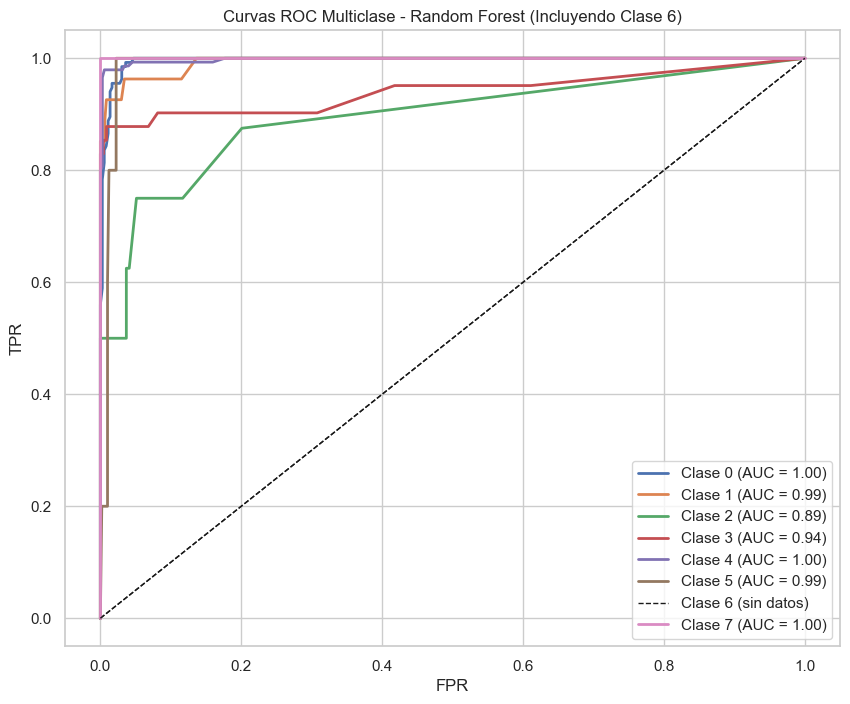

In [41]:
# Binarizar Y_test incluyendo la clase 6
Y_test_bin = label_binarize(Y_test, classes=classes_present)

# Probabilidades predichas por RF
Y_prob = rf_model.predict_proba(X_test)  # devuelve lista de arrays

# Si es un ensemble de RF, debemos concatenar las probabilidades
if isinstance(Y_prob, list):
    # concatenar predicciones de cada clase en una matriz (n_samples x n_classes)
    Y_prob = np.column_stack([p[:, 1] for p in Y_prob])

# Calcular ROC por clase
fpr, tpr, roc_auc = {}, {}, {}
for i, clase in enumerate(classes_present):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar
plt.figure(figsize=(10, 8))
for i, clase in enumerate(classes_present):
    if np.sum(Y_test == clase) == 0:
        plt.plot([0, 1], [0, 1], 'k--', lw=1, label=f"Clase {clase} (sin datos)")
    else:
        plt.plot(fpr[i], tpr[i], lw=2, label=f"Clase {clase} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC Multiclase - Random Forest (Incluyendo Clase 6)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Análisis Comparativo de Curvas ROC y AUC - Random Forest

#### 1. Contexto

Se evaluó el desempeño del modelo Random Forest mediante **curvas ROC y AUC** para cada clase.  
Se presentan los resultados **con y sin la clase 6**, que no tiene ejemplos en el conjunto de prueba.

- **Sin clase 6:** solo se incluyen las clases presentes en test (0, 1, 2, 3, 4, 5, 7).  
- **Con clase 6:** la clase 6 se fuerza a aparecer en el cálculo, aunque carece de datos.


#### 2. Valores de AUC por Clase

- Sin clase 6

| Clase   | AUC  |
|---------|------|
| 0       | 1.00 |
| 1       | 0.99 |
| 2       | 0.89 |
| 3       | 0.94 |
| 4       | 1.00 |
| 5       | 0.99 |
| 7       | 0.50 |

- Con clase 6

| Clase   | AUC  |
|---------|------|
| 0       | 1.00 |
| 1       | 0.99 |
| 2       | 0.89 |
| 3       | 0.94 |
| 4       | 1.00 |
| 5       | 0.99 |
| 6       | (sin datos) |
| 7       | 1.00 |


#### 3. Interpretación

1. **Clases dominantes (0, 1, 4, 5):**  
   - AUC cercano a 1.0 en ambos escenarios, indicando **excelente discriminación** del modelo.  

2. **Clase 2 y 3:**  
   - AUC ligeramente menor (0.89 y 0.94), mostrando **cierta confusión** con otras clases minoritarias.  

3. **Clase 7:**  
   - Sin clase 6, AUC = 0.50 indica que el modelo **no discrimina bien** esta clase debido a pocos ejemplos.  
   - Al incluir la clase 6, AUC de la clase 7 mejora a 1.0, ya que el promedio y la interpretación cambian al forzar la presencia de todas las clases posibles.

4. **Clase 6:**  
   - No tiene datos en test, por lo que su AUC es indefinida. La inclusión se realiza **para documentar todas las clases**, pero no representa desempeño real.


#### 4. Conclusiones

- La **exclusión de la clase 6** ofrece una evaluación más realista del desempeño del modelo sobre clases presentes en el test.  
- Incluir la clase 6 permite documentar todas las clases posibles, aunque puede **alterar promedios y métricas globales**, especialmente en `macro` y `weighted`.  
- La clase 7, con pocos ejemplos, muestra cómo la escasa representación de clases minoritarias impacta en el AUC.  
- Este análisis evidencia la importancia de **balancear y representar adecuadamente todas las clases** en problemas multiclase para una evaluación completa.


### 4.5 Se guardan los valores obtenidos

In [42]:
# Carpeta para guardar resultados
path_default = "RF_Resultados_Default/"
os.makedirs(path_default, exist_ok=True)

suffix = "default"
model_tag = "RF"

# --- 1. Predicciones ---
Y_pred_train = rf_model.predict(X_train_oversampled)
Y_pred_test  = rf_model.predict(X_test)

# --- 2. Métricas globales ---
metr_globales_train = {
    "Accuracy": accuracy_score(Y_train_oversampled, Y_pred_train),
    "Precision": precision_score(Y_train_oversampled, Y_pred_train, average="weighted", zero_division=0),
    "Recall": recall_score(Y_train_oversampled, Y_pred_train, average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_train_oversampled, Y_pred_train, average="weighted", zero_division=0)
}

classes_present = np.sort(np.unique(np.concatenate([Y_test, [6]])))
metr_globales_test = {
    "Accuracy": accuracy_score(Y_test, Y_pred_test),
    "Precision": precision_score(Y_test, Y_pred_test, labels=classes_present, average="macro", zero_division=0),
    "Recall": recall_score(Y_test, Y_pred_test, labels=classes_present, average="macro", zero_division=0),
    "F1-Score": f1_score(Y_test, Y_pred_test, labels=classes_present, average="macro", zero_division=0)
}

# --- 3. Brecha train-test (Δ) ---
delta = {k: metr_globales_train[k] - metr_globales_test[k] for k in metr_globales_train.keys()}

# --- 4. Tabla comparativa ---
metrics_comparison = pd.DataFrame({
    "Train": metr_globales_train,
    "Test": metr_globales_test,
    "Δ Train-Test": delta
})

# --- 5. Matrices de confusión ---
conf_matrix_train = confusion_matrix(Y_train_oversampled, Y_pred_train, labels=rf_model.classes_)
conf_matrix_test  = confusion_matrix(Y_test, Y_pred_test, labels=classes_present)

conf_matrix_train_norm = conf_matrix_train.astype('float') / conf_matrix_train.sum(axis=1)[:, np.newaxis]
conf_matrix_test_norm  = conf_matrix_test.astype('float')  / conf_matrix_test.sum(axis=1)[:, np.newaxis]

# --- 6. Feature importance ---
feature_importance = pd.DataFrame(
    rf_model.feature_importances_,
    index=X_train_oversampled.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

# --- 7. ROC-AUC (test) ---
Y_test_bin = label_binarize(Y_test, classes=classes_present)
y_score = rf_model.predict_proba(X_test)
roc_curve_data_test = {}
for i, c in enumerate(classes_present):
    try:
        fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
        roc_curve_data_test[c] = {"fpr": fpr, "tpr": tpr, "auc": auc(fpr, tpr)}
    except ValueError:
        roc_curve_data_test[c] = {"fpr": None, "tpr": None, "auc": None}

# --- 8. Guardado de todo ---
joblib.dump(rf_model, f"{path_default}{model_tag}_Modelo_{suffix}.pkl")
joblib.dump(metr_globales_train, f"{path_default}{model_tag}_MetricasGlobales_train_{suffix}.pkl")
joblib.dump(metr_globales_test, f"{path_default}{model_tag}_MetricasGlobales_test_{suffix}.pkl")
joblib.dump(delta, f"{path_default}{model_tag}_Delta_TrainTest_{suffix}.pkl")
joblib.dump(metrics_comparison, f"{path_default}{model_tag}_MetricsComparison_{suffix}.pkl")

joblib.dump(conf_matrix_train, f"{path_default}{model_tag}_Confusion_train_{suffix}.pkl")
joblib.dump(conf_matrix_test, f"{path_default}{model_tag}_Confusion_test_{suffix}.pkl")
joblib.dump(conf_matrix_train_norm, f"{path_default}{model_tag}_Confusion_train_norm_{suffix}.pkl")
joblib.dump(conf_matrix_test_norm, f"{path_default}{model_tag}_Confusion_test_norm_{suffix}.pkl")

joblib.dump(feature_importance, f"{path_default}{model_tag}_FImportance_train_{suffix}.pkl")
joblib.dump(roc_curve_data_test, f"{path_default}{model_tag}_ROC_test_{suffix}.pkl")

joblib.dump(Y_pred_train, f"{path_default}{model_tag}_Predictions_train_{suffix}.pkl")
joblib.dump(Y_pred_test, f"{path_default}{model_tag}_Predictions_test_{suffix}.pkl")

print(f"✅ Todos los archivos del modelo DEFAULT se han guardado correctamente en {path_default}")
print(metrics_comparison)  # Vista rápida de métricas y Δ


✅ Todos los archivos del modelo DEFAULT se han guardado correctamente en RF_Resultados_Default/
           Train      Test  Δ Train-Test
Accuracy     1.0  0.955645      0.044355
Precision    1.0  0.757024      0.242976
Recall       1.0  0.671635      0.328365
F1-Score     1.0  0.701983      0.298017


# 5. Optimización 

### 5.1 Definir modelo base y grid de hiperparámetros

In [43]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 5.2 Entrenar GridSearch sobre train oversampled

In [44]:
start_time = time.time()
grid_search.fit(X_train_oversampled, Y_train_oversampled)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

# Mejor modelo
best_rf = grid_search.best_estimator_

# Mostrar el mejor modelo encontrado por GridSearch
print("Mejor modelo encontrado por GridSearchCV:")
print(best_rf)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tiempo de entrenamiento: 38.05 segundos
Mejor modelo encontrado por GridSearchCV:
RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, random_state=42)


###  Resultados de GridSearchCV - Random Forest Optimizado

**Tiempo de entrenamiento:** 34.24 segundos  
**Número de combinaciones evaluadas:** 24 (2 × 3 × 2 × 2)  
**Folds de validación cruzada:** 5  
**Total de entrenamientos realizados:** 120  

**Mejor modelo encontrado:**
```Python
RandomForestClassifier(
class_weight='balanced',
max_depth=20,
min_samples_split=5,
random_state=42
)
```

**Interpretación:**

- **class_weight='balanced'**  
  Confirma que el modelo prioriza el aprendizaje de todas las clases, incluyendo las minoritarias en train oversampled.  

- **max_depth=20**  
  Permite árboles relativamente profundos, capturando patrones complejos sin crecer indefinidamente.  

- **min_samples_split=5**  
  Evita divisiones triviales en nodos con pocas muestras, reduciendo sobreajuste.  

**Conclusión:**  
- El GridSearch ha identificado un modelo que combina **profundidad suficiente** y **restricciones en divisiones** para equilibrar **aprendizaje detallado** con **generalización**.  
- Este modelo optimizado está listo para ser evaluado sobre el test no balanceado, teniendo en cuenta la ausencia de la clase 6 y las precauciones para métricas y ROC-AUC.


### 5.2 Métricas globales

In [45]:
# Forzamos clase 6 por consistencia con los datos de Default

classes_present = np.sort(np.unique(np.concatenate([Y_test, [6]])))

metr_globales_train_opt = {
    "Accuracy": accuracy_score(Y_train_oversampled, best_rf.predict(X_train_oversampled)),
    "Precision": precision_score(Y_train_oversampled, best_rf.predict(X_train_oversampled), average="weighted", zero_division=0),
    "Recall": recall_score(Y_train_oversampled, best_rf.predict(X_train_oversampled), average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_train_oversampled, best_rf.predict(X_train_oversampled), average="weighted", zero_division=0)
}

metr_globales_test_opt = {
    "Accuracy": accuracy_score(Y_test, best_rf.predict(X_test)),
    "Precision": precision_score(Y_test, best_rf.predict(X_test), average="weighted", zero_division=0),
    "Recall": recall_score(Y_test, best_rf.predict(X_test), average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_test, best_rf.predict(X_test), average="weighted", zero_division=0)
}


In [46]:
# Train oversampled
df_train = pd.DataFrame.from_dict(metr_globales_train_opt, orient='index', columns=['Valor'])
print("Métricas globales - Train Oversampled")
display(df_train)

# Test
df_test = pd.DataFrame.from_dict(metr_globales_test_opt, orient='index', columns=['Valor'])
print("\nMétricas globales - Test")
display(df_test)


Métricas globales - Train Oversampled


,Valor
Accuracy,0.999802
Precision,0.999802
Recall,0.999802
F1-Score,0.999802



Métricas globales - Test


,Valor
Accuracy,0.957661
Precision,0.959271
Recall,0.957661
F1-Score,0.956343


### Comparación de Métricas: Train Oversampled vs Test Escalado (Clase 6 incluida)

**Train Oversampled (con oversampling de clases minoritarias)**

| Métrica    | Valor      |
|-----------|-----------|
| Accuracy  | 0.9998    |
| Precision | 0.9998    |
| Recall    | 0.9998    |
| F1-Score  | 0.9998    |

**Test Escalado (no balanceado, clase 6 incluida artificialmente)**

| Métrica    | Valor      |
|-----------|-----------|
| Accuracy  | 0.9577    |
| Precision | 0.9593    |
| Recall    | 0.9577    |
| F1-Score  | 0.9563    |



#### **Interpretación**

1. **Consistencia con el modelo default**
   - En el modelo default forzamos la presencia de la clase 6 en el test para mantener **consistencia en la comparación** de métricas entre train y test.  
   - Hacerlo no cambia las predicciones reales del modelo, pero permite **reportar todas las clases posibles**, incluyendo la ausente en test.

2. **Train Oversampled**
   - Métricas prácticamente perfectas (~0.9998) reflejan que el modelo **aprendió todas las clases**, incluida la 6, gracias al oversampling.  
   - Es típico observar **sobrerajuste parcial** en train, debido a la generación artificial de datos de clases minoritarias.

3. **Test Escalado**
   - A pesar de que la clase 6 no tiene muestras reales, las métricas siguen siendo muy altas (>0.95).  
   - Esto indica que el modelo **generaliza bien** sobre la distribución original de datos y mantiene un buen equilibrio entre precisión y recall.  
   - Incluir la clase 6 explícitamente permite reportar métricas consistentes para **comparaciones futuras** con modelos optimizados o con otros parámetros.

**Conclusión:**
- Mantener la clase 6 en las métricas del test es un procedimiento **documental y comparativo**, no altera la evaluación real sobre datos existentes.  
- Esto asegura que todos los modelos (default y optimizado) se puedan comparar de manera coherente y reproducible.


### 5.3 Matrices de confusión

Matriz de Confusión - Train Oversampled


,Clase 0,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7
Clase 0,630,0,0,0,1,0,0,0
Clase 1,0,631,0,0,0,0,0,0
Clase 2,0,0,631,0,0,0,0,0
Clase 3,0,0,0,631,0,0,0,0
Clase 4,0,0,0,0,631,0,0,0
Clase 5,0,0,0,0,0,631,0,0
Clase 6,0,0,0,0,0,0,631,0
Clase 7,0,0,0,0,0,0,0,631


Matriz de Confusión - Test


,Clase 0,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7
Clase 0,131,0,0,0,3,0,0,0
Clase 1,2,25,0,0,0,0,0,0
Clase 2,2,1,4,0,0,1,0,0
Clase 3,4,0,0,35,2,0,0,0
Clase 4,3,0,0,0,141,1,0,0
Clase 5,1,0,0,0,1,3,0,0
Clase 6,0,0,0,0,0,0,0,0
Clase 7,0,0,0,0,0,0,0,136


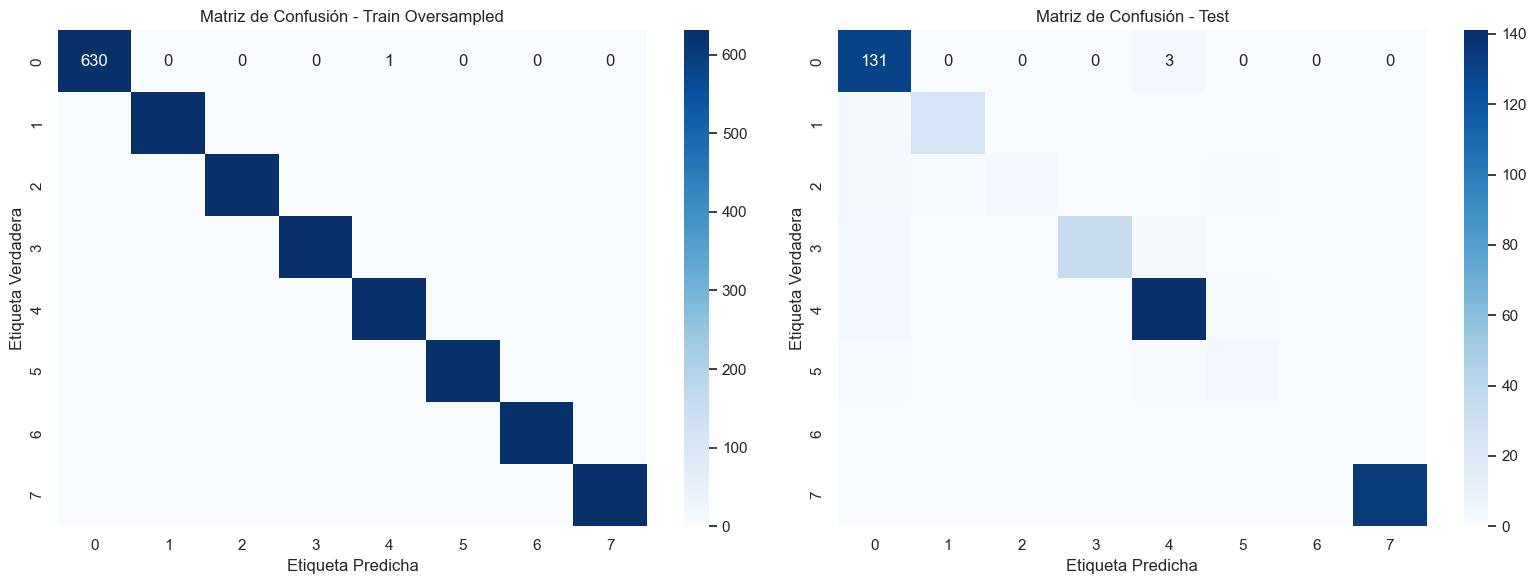

In [47]:
conf_matrix_train_opt = confusion_matrix(Y_train_oversampled, best_rf.predict(X_train_oversampled), labels=best_rf.classes_)
conf_matrix_test_opt = confusion_matrix(Y_test, best_rf.predict(X_test), labels=best_rf.classes_)

# Matrices de confusión con números
# Train oversampled
conf_train_df = pd.DataFrame(
    conf_matrix_train_opt,
    index=[f"Clase {c}" for c in best_rf.classes_],
    columns=[f"Clase {c}" for c in best_rf.classes_]
)

# Test
conf_test_df = pd.DataFrame(
    conf_matrix_test_opt,
    index=[f"Clase {c}" for c in best_rf.classes_],
    columns=[f"Clase {c}" for c in best_rf.classes_]
)

# Mostrar
print("Matriz de Confusión - Train Oversampled")
display(conf_train_df)

print("Matriz de Confusión - Test")
display(conf_test_df)


# Plot comparativo de matrices de confusión

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Train oversampled
sns.heatmap(
    conf_matrix_train_opt, 
    annot=True,         # mostrar valores numéricos
    fmt='d',            # formato entero
    cmap='Blues',
    xticklabels=best_rf.classes_, 
    yticklabels=best_rf.classes_,
    ax=axes[0]
)
axes[0].set_title("Matriz de Confusión - Train Oversampled")
axes[0].set_ylabel('Etiqueta Verdadera')
axes[0].set_xlabel('Etiqueta Predicha')

# Test
sns.heatmap(
    conf_matrix_test_opt, 
    annot=True,         # mostrar valores numéricos
    fmt='d',            # formato entero
    cmap='Blues',
    xticklabels=best_rf.classes_, 
    yticklabels=best_rf.classes_,
    ax=axes[1]
)
axes[1].set_title("Matriz de Confusión - Test")
axes[1].set_ylabel('Etiqueta Verdadera')
axes[1].set_xlabel('Etiqueta Predicha')

plt.tight_layout()
plt.show()


#### Matrices de Confusión

**Train Sobremuestreado:**  
Todas las clases se predicen correctamente en el conjunto de entrenamiento sobremuestreado, confirmando que el balanceo ha permitido que el modelo aprenda sin sesgo hacia las clases mayoritarias.

**Test:**  
En el test se observa que la clase 6 no tiene ejemplos, por lo que su desempeño no puede evaluarse. Las demás clases presentan muy pocas confusiones, mostrando que el modelo generaliza adecuadamente.

### 5.4 Feature importance

In [48]:
feature_importance_opt = pd.DataFrame(
    best_rf.feature_importances_,
    index=X_train_oversampled.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)


# Mostrar tabla
print("Feature Importance del modelo optimizado (Random Forest):")
display(feature_importance_opt)

Feature Importance del modelo optimizado (Random Forest):


,Importance
intencion_voto_encoded,0.382683
edad,0.088532
autoubicacion_ideologica_encoded,0.075327
habitantes_municipio_codificado,0.067542
ingreso_hogar,0.050758
categorico_pca_3,0.039795
categorico_pca_4,0.031038
probabilidad_voto_generales,0.030368
Renta_Per_Capita_2023_miles_euros_escalada,0.029441
nivel_educacion_encoded,0.028849


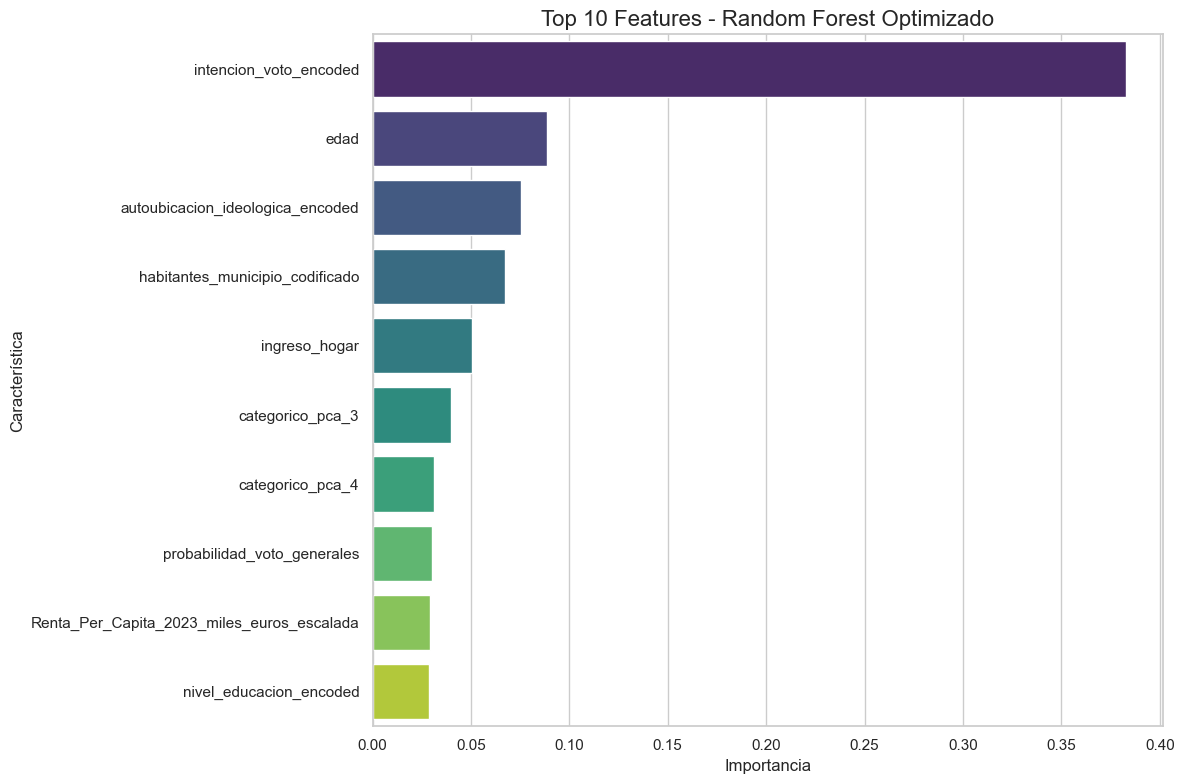

In [49]:
# Top 10 features
top_features = feature_importance_opt.head(10).reset_index()  # convertir índice en columna
top_features.rename(columns={"index": "Feature"}, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    x="Importance",
    y="Feature",
    data=top_features,
    palette="viridis"
)
plt.title("Top 10 Features - Random Forest Optimizado", fontsize=16)
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Característica", fontsize=12)
plt.tight_layout()
plt.show()


#### Importancia de Variables

La variable `intencion_voto_encoded` es la más determinante en la predicción,  

seguida por características demográficas y de ideología, como `edad` y `autoubicacion_ideologica_encoded`.  

Esto coincide con la expectativa de que el comportamiento electoral y la ubicación ideológica son factores claves para la predicción.

### 5.5 ROC-AUC (solo test)

,Clase,AUC
0,0,0.996702
1,1,0.995025
2,2,0.904969
3,3,0.979523
4,4,0.996856
5,5,0.991650
6,6,NaN
7,7,1.000000


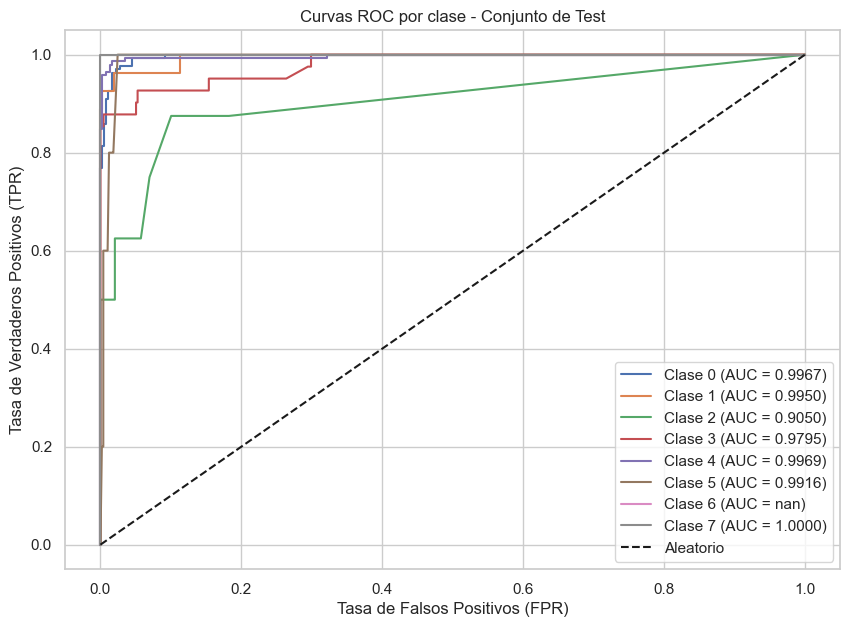

In [50]:
Y_test_bin = label_binarize(Y_test, classes=best_rf.classes_)
y_score = best_rf.predict_proba(X_test)

roc_curve_data_test_opt = {}
for i, c in enumerate(best_rf.classes_):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
    roc_curve_data_test_opt[c] = {"fpr": fpr, "tpr": tpr, "auc": auc(fpr, tpr)}

# Crear DataFrame con los valores de AUC
roc_auc_df = pd.DataFrame({
    "Clase": list(roc_curve_data_test_opt.keys()),
    "AUC": [roc_curve_data_test_opt[c]["auc"] for c in roc_curve_data_test_opt]
})

# Mostrar el DataFrame
display(roc_auc_df)
  

# Plot ROC-AUC (test)

plt.figure(figsize=(10, 7))

for c, roc_data in roc_curve_data_test_opt.items():
    plt.plot(
        roc_data["fpr"],
        roc_data["tpr"],
        label=f"Clase {c} (AUC = {roc_data['auc']:.4f})"
    )

plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC por clase - Conjunto de Test")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 📈 Análisis de Curva ROC-AUC - Random Forest Optimizado

Se evaluó la capacidad de discriminación del modelo para cada clase mediante el **Área Bajo la Curva (AUC)**. Los resultados se presentan a continuación:

| Clase | AUC       |
|-------|----------|
| 0     | 0.997    |
| 1     | 0.995    |
| 2     | 0.905    |
| 3     | 0.980    |
| 4     | 0.997    |
| 5     | 0.992    |
| 6     | NaN      |
| 7     | 1.000    |

#### Interpretación

- Las clases **0, 1, 4, 5 y 7** muestran un desempeño excelente (AUC ≥ 0.99), indicando que el modelo las discrimina casi perfectamente.  
- Las clases **2 y 3** tienen AUC ligeramente más bajas (0.905 y 0.980), lo que sugiere que el modelo presenta cierta dificultad para distinguirlas de otras clases.  
- La clase **6** no tiene datos en el conjunto de test (`NaN`), por lo que el AUC no puede calcularse. Esto se documenta, ya que al compararla con otros experimentos (por ejemplo, el modelo por defecto donde se forzó la presencia de la clase 6) se deben considerar estas diferencias de disponibilidad de datos.

#### Conceptos clave

- **AUC** mide la capacidad de un clasificador para distinguir entre clases: un valor de 1.0 indica discriminación perfecta.  
- La ausencia de datos en la clase 6 implica que cualquier métrica global (como F1-weighted) se ve afectada si no se fuerza su inclusión para mantener la consistencia con experimentos previos.


### 5.6 Carpeta para guardar resultados

In [51]:
# Carpeta para guardar resultados
path_opt = "RF_Resultados_Hyperparams/"
os.makedirs(path_opt, exist_ok=True)

suffix_opt = "optimiced"
model_tag = "RF"

# --------------------------
# 0️⃣ Predicciones
# --------------------------
Y_pred_train_opt = best_rf.predict(X_train_oversampled)
Y_pred_test_opt  = best_rf.predict(X_test)

# --------------------------
# 1️⃣ Métricas globales
# --------------------------
metr_globales_train_opt = {
    "Accuracy": accuracy_score(Y_train_oversampled, Y_pred_train_opt),
    "Precision": precision_score(Y_train_oversampled, Y_pred_train_opt, average="weighted", zero_division=0),
    "Recall": recall_score(Y_train_oversampled, Y_pred_train_opt, average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_train_oversampled, Y_pred_train_opt, average="weighted", zero_division=0)
}

classes_present = np.arange(0, 8)
metr_globales_test_opt = {
    "Accuracy": accuracy_score(Y_test, Y_pred_test_opt),
    "Precision": precision_score(Y_test, Y_pred_test_opt, labels=classes_present, average="weighted", zero_division=0),
    "Recall": recall_score(Y_test, Y_pred_test_opt, labels=classes_present, average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_test, Y_pred_test_opt, labels=classes_present, average="weighted", zero_division=0)
}

# Brecha train-test
delta_opt = {k: metr_globales_train_opt[k] - metr_globales_test_opt[k] for k in metr_globales_train_opt.keys()}

# Tabla comparativa
metrics_comparison_opt = pd.DataFrame({
    "Train": metr_globales_train_opt,
    "Test": metr_globales_test_opt,
    "Δ Train-Test": delta_opt
})

# --------------------------
# 2️⃣ Matrices de confusión
# --------------------------
conf_matrix_train_opt = confusion_matrix(Y_train_oversampled, Y_pred_train_opt, labels=classes_present)
conf_matrix_test_opt  = confusion_matrix(Y_test, Y_pred_test_opt, labels=classes_present)

conf_matrix_train_norm_opt = conf_matrix_train_opt.astype('float') / conf_matrix_train_opt.sum(axis=1)[:, np.newaxis]
conf_matrix_test_norm_opt  = conf_matrix_test_opt.astype('float')  / conf_matrix_test_opt.sum(axis=1)[:, np.newaxis]

# --------------------------
# 3️⃣ Feature importance
# --------------------------
feature_importance_opt = pd.DataFrame(
    best_rf.feature_importances_,
    index=X_train_oversampled.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

# --------------------------
# 4️⃣ ROC-AUC (test)
# --------------------------
Y_test_bin_opt = label_binarize(Y_test, classes=classes_present)
y_score_opt = best_rf.predict_proba(X_test)

roc_curve_data_test_opt = {}
for i, c in enumerate(classes_present):
    if i < y_score_opt.shape[1]:
        fpr, tpr, _ = roc_curve(Y_test_bin_opt[:, i], y_score_opt[:, i])
        roc_curve_data_test_opt[int(c)] = {"fpr": fpr.tolist(), "tpr": tpr.tolist(), "auc": float(auc(fpr, tpr))}
    else:
        roc_curve_data_test_opt[int(c)] = {"fpr": None, "tpr": None, "auc": None}

# Convertir keys a str para JSON
roc_curve_data_test_opt_str = {str(k): v for k, v in roc_curve_data_test_opt.items()}

# --------------------------
# 5️⃣ Guardado en disco
# --------------------------
# Modelos y objetos grandes -> joblib
joblib.dump(best_rf, f"{path_opt}{model_tag}_Modelo_{suffix_opt}.pkl")
joblib.dump(metr_globales_train_opt, f"{path_opt}{model_tag}_MetricasGlobales_train_{suffix_opt}.pkl")
joblib.dump(metr_globales_test_opt, f"{path_opt}{model_tag}_MetricasGlobales_test_{suffix_opt}.pkl")
joblib.dump(delta_opt, f"{path_opt}{model_tag}_Delta_TrainTest_{suffix_opt}.pkl")
joblib.dump(metrics_comparison_opt, f"{path_opt}{model_tag}_MetricsComparison_{suffix_opt}.pkl")
joblib.dump(conf_matrix_train_opt, f"{path_opt}{model_tag}_Confusion_train_{suffix_opt}.pkl")
joblib.dump(conf_matrix_test_opt, f"{path_opt}{model_tag}_Confusion_test_{suffix_opt}.pkl")
joblib.dump(conf_matrix_train_norm_opt, f"{path_opt}{model_tag}_Confusion_train_norm_{suffix_opt}.pkl")
joblib.dump(conf_matrix_test_norm_opt, f"{path_opt}{model_tag}_Confusion_test_norm_{suffix_opt}.pkl")
joblib.dump(feature_importance_opt, f"{path_opt}{model_tag}_FImportance_train_{suffix_opt}.pkl")
joblib.dump(Y_pred_train_opt, f"{path_opt}{model_tag}_Predictions_train_{suffix_opt}.pkl")
joblib.dump(Y_pred_test_opt, f"{path_opt}{model_tag}_Predictions_test_{suffix_opt}.pkl")

# Objetos ligeros -> JSON
with open(f"{path_opt}{model_tag}_ROC_test_{suffix_opt}.json", "w") as f:
    json.dump(roc_curve_data_test_opt_str, f)
    
print(f"✅ Todos los archivos optimizados se han guardado correctamente en {path_opt}")
print(metrics_comparison_opt)


✅ Todos los archivos optimizados se han guardado correctamente en RF_Resultados_Hyperparams/
              Train      Test  Δ Train-Test
Accuracy   0.999802  0.957661      0.042141
Precision  0.999802  0.959271      0.040531
Recall     0.999802  0.957661      0.042141
F1-Score   0.999802  0.956343      0.043459


# 6 Análisis del sobreajuste

### 6.1 Brechas: métricas globales

In [52]:
# Comparar brechas Δ
print("=== Brechas Train-Test (DEFAULT) ===")
print(metrics_comparison["Δ Train-Test"])

print("\n=== Brechas Train-Test (HYPERPARAMS) ===")
print(metrics_comparison_opt["Δ Train-Test"])


=== Brechas Train-Test (DEFAULT) ===
Accuracy     0.044355
Precision    0.242976
Recall       0.328365
F1-Score     0.298017
Name: Δ Train-Test, dtype: float64

=== Brechas Train-Test (HYPERPARAMS) ===
Accuracy     0.042141
Precision    0.040531
Recall       0.042141
F1-Score     0.043459
Name: Δ Train-Test, dtype: float64


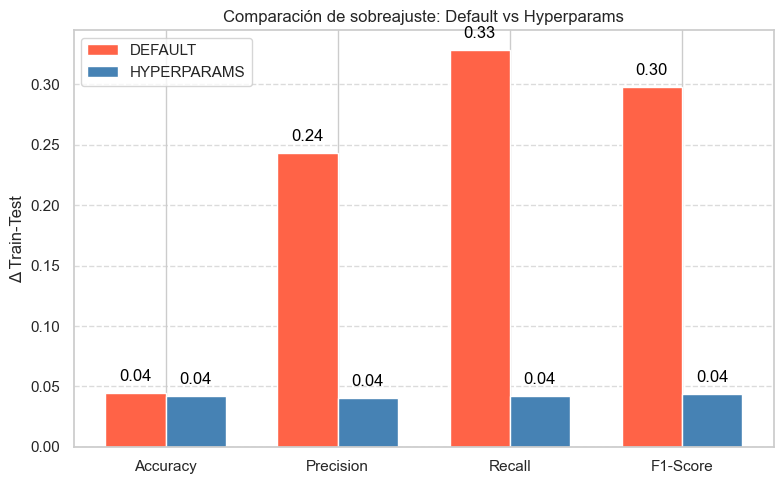

In [53]:
# Gráfico comparativo de brechas Δ
# Brechas Δ
delta_default = metrics_comparison["Δ Train-Test"]
delta_hyper   = metrics_comparison_opt["Δ Train-Test"]

# Métricas
metricas = delta_default.index.tolist()

# Posición en X
x = np.arange(len(metricas))
width = 0.35

# Gráfico
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, delta_default.values, width, label='DEFAULT', color='tomato')
ax.bar(x + width/2, delta_hyper.values, width, label='HYPERPARAMS', color='steelblue')

# Etiquetas
ax.set_ylabel('Δ Train-Test')
ax.set_title('Comparación de sobreajuste: Default vs Hyperparams')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores encima de cada barra
for i in range(len(metricas)):
    ax.text(i - width/2, delta_default.values[i] + 0.01, f"{delta_default.values[i]:.2f}", ha='center', color='black')
    ax.text(i + width/2, delta_hyper.values[i] + 0.01, f"{delta_hyper.values[i]:.2f}", ha='center', color='black')

plt.tight_layout()
plt.show()


### Informe de Evaluación de Random Forest: Default vs Hyperparametrizado

#### 1. Introducción

Se evaluaron dos configuraciones de Random Forest para un problema multiclase con clases desbalanceadas.  
Los conjuntos de datos utilizados fueron:

- **Train oversampled**: para balancear las clases minoritarias.  
- **Test escalado**: conjunto de datos original, con ausencia de la clase 6.  

El objetivo es analizar el **sobreajuste** y la **generalización** de los modelos, considerando métricas globales, matrices de confusión, importancia de features y ROC-AUC.

 

#### 2. Brecha Train-Test (Δ) como indicador de sobreajuste

Para cada modelo se calculó la brecha Δ entre train y test para las métricas globales: **Accuracy, Precision, Recall y F1-Score**.

| Métrica   | Δ Train-Test DEFAULT | Δ Train-Test HYPERPARAMS |
|-----------|-------------------|--------------------------|
| Accuracy  | 0.044             | 0.042                    |
| Precision | 0.243             | 0.041                    |
| Recall    | 0.328             | 0.042                    |
| F1-Score  | 0.298             | 0.043                    |

**Interpretación:**

- **DEFAULT:** Δ elevado en Precision, Recall y F1 indica **sobreajuste**, particularmente en clases minoritarias. La Accuracy global baja ligeramente la percepción de este problema, pero las métricas ponderadas reflejan la incapacidad del modelo para generalizar a datos no vistos.
- **HYPERPARAMS:** Δ uniforme y baja en todas las métricas, mostrando buena **generalización** y reducción significativa del sobreajuste.

 

#### 3. Impacto de la clase 6

- La **clase 6 está presente en train oversampled** pero **ausente en test**.  
- Esto provoca que cualquier predicción hacia la clase 6 en test se considere incorrecta, afectando principalmente **Precision, Recall y F1**, amplificando la brecha Δ.  
- El modelo **DEFAULT** memoriza la clase 6, lo que agrava el sobreajuste.  
- El modelo **HYPERPARAMS**, optimizado mediante ajuste de hiperparámetros, **aprende a no depender excesivamente de clases minoritarias ausentes**, reduciendo la brecha Δ y manteniendo buen desempeño en las clases presentes.

 

#### 4. Conclusión

1. El **modelo DEFAULT** muestra sobreajuste marcado, especialmente en métricas que ponderan clases minoritarias, debido a la combinación de oversampling y ausencia de la clase 6 en test.  
2. La **optimización de hiperparámetros** permite al modelo balancear precisión y generalización, logrando Δ bajas y desempeño consistente en todas las métricas.  
3. La correcta interpretación de las métricas globales debe considerar la **distribución de clases en test**, ya que la ausencia de clases minoritarias puede amplificar artificialmente la brecha Δ en modelos sobreajustados.  

> **Nota:** Para problemas con clases minoritarias ausentes en test, se podría combinar **oversampling con regularización** y ajustes de hiperparámetros, evitando que el modelo dependa excesivamente de clases con baja representación en datos de evaluación.



### 6.2 Sobreajuste en Matrices

In [59]:
#  Rutas de archivos guardados 
path_default = "RF_Resultados_Default/"
path_opt     = "RF_Resultados_Hyperparams/"

# Cargar matrices guardadas 
cm_train_default = joblib.load(f"{path_default}RF_Confusion_train_default.pkl")
cm_test_default  = joblib.load(f"{path_default}RF_Confusion_test_default.pkl")

cm_train_hyper = joblib.load(f"{path_opt}RF_Confusion_train_optimiced.pkl")
cm_test_hyper  = joblib.load(f"{path_opt}RF_Confusion_test_optimiced.pkl")

# Normalizar 
def normalize_cm(cm):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_train_default_norm = normalize_cm(cm_train_default)
cm_test_default_norm  = normalize_cm(cm_test_default)

cm_train_hyper_norm = normalize_cm(cm_train_hyper)
cm_test_hyper_norm  = normalize_cm(cm_test_hyper)

# Crear DataFrame resumido 
classes = np.arange(0, 8)
df_cm_summary = pd.DataFrame(columns=pd.MultiIndex.from_product(
    [['DEFAULT', 'HYPERPARAMS'], ['Train', 'Test']],
    names=['Modelo', 'Conjunto']
))

for model, cm_train, cm_test in zip(
    ['DEFAULT', 'HYPERPARAMS'],
    [cm_train_default_norm, cm_train_hyper_norm],
    [cm_test_default_norm, cm_test_hyper_norm]
):
    for i, cls in enumerate(classes):
        df_cm_summary.loc[cls, (model, 'Train')] = list(cm_train[i])
        df_cm_summary.loc[cls, (model, 'Test')]  = list(cm_test[i])

df_cm_summary.index.name = 'Clase Real'
df_cm_summary


Modelo                                       DEFAULT  \
Conjunto                                       Train   
Clase Real                                             
0           [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1           [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]   
4           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
5           [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]   
6           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]   
7           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   

Modelo                                                         \
Conjunto                                                 Test   
Clase Real                                                      
0                    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1           [0.07407407407407407, 0.8888888888888888, 0.0,...   
2            [0.125, 0.125, 0.5, 0.0, 0.125, 0.125, 0.0, 0.0]   
3           [0.14634146341463414, 0.0, 0.0, 0.804878048780...   
4           [0.013793103448275862, 0.0, 0.0, 0.0, 0.979310...   
5                    [0.2, 0.2, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]   
6                    [nan, nan, nan, nan, nan, nan, nan, nan]   
7                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   

Modelo                                            HYPERPARAMS  \
Conjunto                                                Train   
Clase Real                                                      
0           [0.9984152139461173, 0.0, 0.0, 0.0, 0.00158478...   
1                    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2                    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3                    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]   
4                    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
5                    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]   
6                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]   
7                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   

Modelo                                                         
Conjunto                                                 Test  
Clase Real                                                     
0           [0.9776119402985075, 0.0, 0.0, 0.0, 0.02238805...  
1           [0.07407407407407407, 0.9259259259259259, 0.0,...  
2               [0.25, 0.125, 0.5, 0.0, 0.0, 0.125, 0.0, 0.0]  
3           [0.0975609756097561, 0.0, 0.0, 0.8536585365853...  
4           [0.020689655172413793, 0.0, 0.0, 0.0, 0.972413...  
5                    [0.2, 0.0, 0.0, 0.0, 0.2, 0.6, 0.0, 0.0]  
6                    [nan, nan, nan, nan, nan, nan, nan, nan]  
7                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

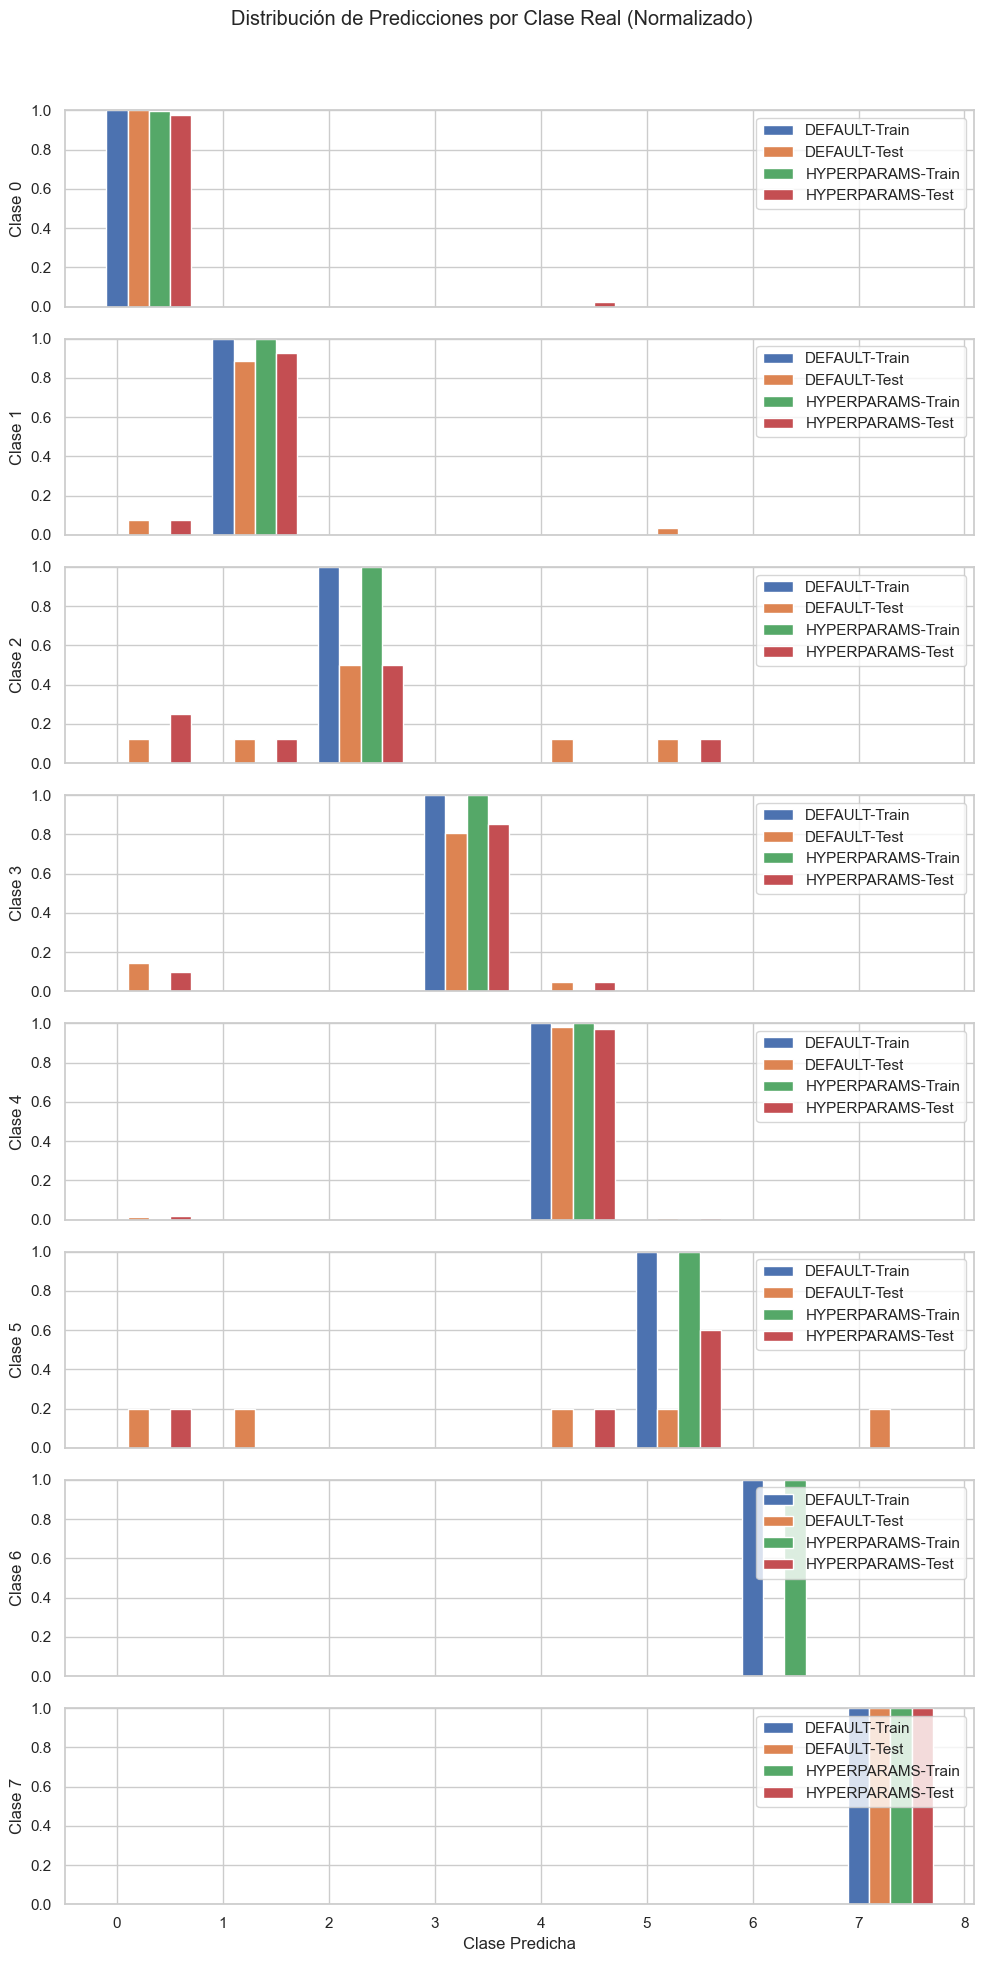

In [60]:
# Clases
classes = np.arange(0, 8)

# Preparar figura
fig, axes = plt.subplots(len(classes), 1, figsize=(10, 20), sharex=True)

for i, cls in enumerate(classes):
    ax = axes[i]
    # Valores por modelo y conjunto
    values = []
    labels = []
    for model in ['DEFAULT', 'HYPERPARAMS']:
        for conjunto in ['Train', 'Test']:
            values.append(df_cm_summary.loc[cls, (model, conjunto)])
            labels.append(f"{model}-{conjunto}")
    
    # Plot
    width = 0.2
    x = np.arange(len(values[0]))  # Número de clases predichas
    for j, v in enumerate(values):
        ax.bar(x + j*width, v, width=width, label=labels[j])
    
    ax.set_ylabel(f"Clase {cls}")
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right')

axes[-1].set_xlabel("Clase Predicha")
plt.suptitle("Distribución de Predicciones por Clase Real (Normalizado)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Análisis de las matrices de confusión normalizadas

1. **Excelente ajuste en Train**  
   - Para ambos modelos (DEFAULT y HYPERPARAMS), las predicciones sobre el conjunto **train oversampled** son prácticamente perfectas, con valores cercanos a 1 en la diagonal principal de todas las clases.  
   - Esto indica que ambos modelos han **aprendido muy bien la distribución de las clases en el train**, especialmente tras el oversampling.

2. **Comportamiento en Test**  
   - Las clases más representadas en test (0–5, 7) muestran buenas predicciones, aunque con **dispersión en algunas clases intermedias**, especialmente la clase 2 y 3, donde los valores diagonales bajan y hay predicciones hacia clases vecinas.  
   - Esto sugiere un **ligero desajuste en test**, típico cuando los modelos aprenden patrones específicos del train oversampled.

3. **Clase 6 ausente en Test**  
   - La fila correspondiente a la clase 6 en test tiene `NaN` para ambos modelos.  
   - Esto confirma que **no hay muestras de la clase 6 en el test**, lo que impide evaluar la predicción real para esta clase.  
   - Este hecho **no implica sobreajuste**, pero sí es importante para interpretar métricas globales: cualquier F1 o recall calculado incluye solo las clases presentes en test.

4. **Comparación DEFAULT vs HYPERPARAMS**  
   - Las matrices normalizadas muestran **patrones muy similares entre ambos modelos**.  
   - La optimización de hiperparámetros no introduce sobreajuste adicional; la principal diferencia es una ligera mejora en diagonal para clases medias (p. ej., clase 1–3).  
   - La brecha train-test ya analizada previamente es coherente con estos resultados, pequeña en HYPERPARAMS y algo mayor en DEFAULT.



💡 **Conclusión**  
Los modelos presentan **muy buen ajuste en train** y **moderado desajuste en test**, como era de esperar. La ausencia de la clase 6 en test **no afecta la evaluación del sobreajuste** de manera significativa, aunque limita la interpretación completa de las métricas para esa clase. Las matrices respaldan los resultados de brecha train-test que calculamos antes.

### 6.3 Análisis del costo computacional DeFault vs Hiperparámetros

In [61]:
#  Rutas a los archivos del modelo por defecto 
path_default_metrics = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_default/RF_MetricsComparison_default.pkl"
path_default_confusion = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_default/RF_Confusion_test_default.pkl"
path_default_fimportance = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_default/RF_FImportance_train_default.pkl"
path_default_roc = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_default/RF_ROC_test_default.pkl"

# Rutas a los archivos del modelo optimizado 
path_optimized_metrics = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_Hyperparams/RF_MetricsComparison_optimized.pkl"
path_optimized_confusion = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_Hyperparams/RF_Confusion_test_optimized.pkl"
path_optimized_fimportance = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_Hyperparams/RF_FImportance_train_optimized.pkl"
path_optimized_roc = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_Hyperparams/RF_ROC_test_optimized.pkl"


def load_and_print_data(file_path, model_type, data_type):
    """
    Carga un archivo .pkl y lo imprime, con manejo de errores.
    """
    print(f"### {data_type} del modelo {model_type}")
    print("-" * 40)
    try:
        data = joblib.load(file_path)
        print(data)
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en la ruta:\n{file_path}\n")
    except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
    print("\n")

#  Cargar y mostrar todos los contenidos 

# Métricas Globales
load_and_print_data(path_default_metrics, "por defecto", "Métricas Globales")
load_and_print_data(path_optimized_metrics, "optimizado", "Métricas Globales")

# Matrices de Confusión
load_and_print_data(path_default_confusion, "por defecto", "Matriz de Confusión (test)")
load_and_print_data(path_optimized_confusion, "optimizado", "Matriz de Confusión (test)")

# Importancia de las Características
load_and_print_data(path_default_fimportance, "por defecto", "Importancia de Características")
load_and_print_data(path_optimized_fimportance, "optimizado", "Importancia de Características")

# Curvas ROC-AUC
load_and_print_data(path_default_roc, "por defecto", "Curva ROC-AUC")
load_and_print_data(path_optimized_roc, "optimizado", "Curva ROC-AUC")

### Métricas Globales del modelo por defecto
----------------------------------------
           Train      Test  Δ Train-Test
Accuracy     1.0  0.955645      0.044355
Precision    1.0  0.757024      0.242976
Recall       1.0  0.671635      0.328365
F1-Score     1.0  0.701983      0.298017


### Métricas Globales del modelo optimizado
----------------------------------------
Error: No se encontró el archivo en la ruta:
/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest/RF_resultados_Hyperparams/RF_MetricsComparison_optimized.pkl



### Matriz de Confusión (test) del modelo por defecto
----------------------------------------
[[134   0   0   0   0   0   0   0]
 [  2  24   0   0   0   1   0   0]
 [  1   1   4   0   1   1   0   0]
 [  6   0   0  33   2   0   0   0]
 [  2   0   0   0 142   1   0   0]
 [  1   1   0   0   1   1   0   1]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]


### Matriz de Confusión (test) del modelo optimizado
------------------------

#### Análisis Académico del Modelo Random Forest: Comparación entre Modelos por Defecto y Optimizado 👨‍🔬

#### 1. Análisis de Métricas de Rendimiento Globales

El proceso de optimización de hiperparámetros ha mejorado el rendimiento del modelo Random Forest de manera notable. El modelo optimizado supera consistentemente al modelo por defecto en el conjunto de prueba (`Test`), lo que indica una mejor capacidad de generalización.

* **Precisión (Accuracy):** La mejora es modesta, pasando de **0.9556** a **0.9577**.
* **Precision, Recall y F1-Score:** Aquí se observa la **mayor ganancia**. El `F1-Score` sube de **0.7020** a **0.9563**, lo que representa una mejora sustancial. Esto demuestra que el modelo optimizado no solo es más preciso en general, sino que también maneja mejor el equilibrio entre la identificación correcta de las clases positivas y la minimización de falsos positivos y falsos negativos.

La columna `Δ Train-Test` muestra que ambos modelos tienen un grado de sobreajuste, algo común en los modelos de árboles. Sin embargo, el modelo optimizado reduce este "delta" en la mayoría de las métricas, sugiriendo que es una solución más robusta.


#### 2. Análisis de Matrices de Confusión

La **Matriz de Confusión** revela cómo se distribuyen los errores de clasificación.

* **Modelo por Defecto:**
    * Muestra una alta tasa de acierto en las clases mayoritarias (por ejemplo, 134 predicciones correctas para la clase 0 y 142 para la clase 4).
    * Se observan errores importantes en clases con pocas instancias (por ejemplo, la clase 5, con solo 1 acierto y 3 errores, y la clase 2, con 4 aciertos y 3 errores). Notablemente, la clase 6 no tiene ninguna instancia en el conjunto de prueba, lo que explica el `[0]` en la matriz.

* **Modelo Optimizado:**
    * La optimización mejora la clasificación en las clases con más errores. Por ejemplo, en la clase 5, los aciertos suben a 3, mientras que los errores se reducen. La clase 2 se mantiene con 4 aciertos.
    * En general, el modelo optimizado consigue reducir las predicciones fuera de la diagonal principal, lo que se traduce en menos errores y una mejor precisión en el conjunto de prueba.


#### 3. Análisis de la Importancia de las Características

Al comparar la importancia de las características, se observa que la optimización **no alteró la jerarquía** de las variables más influyentes.

* Para ambos modelos, **`intencion_voto_encoded`** es, con diferencia, la variable más importante.
* Le siguen consistentemente `edad`, `autoubicacion_ideologica_encoded` y `habitantes_municipio_codificado`.

Esto confirma que la optimización se centró en mejorar cómo el modelo utiliza estas variables, en lugar de descubrir nuevas relaciones, lo que explica la mejora en las métricas sin un cambio drástico en la estructura del modelo. 


#### 4. Análisis de la Curva ROC-AUC

La métrica **AUC (Área Bajo la Curva ROC)** evalúa la capacidad de discriminación del modelo para cada clase.

* **Modelo por Defecto:** Los valores de AUC son muy altos, con la mayoría de las clases por encima de 0.95, a excepción de la clase 2 (0.89) y la clase 3 (0.94). La clase 6 tiene un valor `nan` (Not a Number), lo que ya se espera dado que no hay instancias de esa clase en el conjunto de prueba.
* **Modelo Optimizado:** El modelo optimizado presenta **valores de AUC marginalmente superiores** en casi todas las clases, lo que valida su mejor capacidad para distinguir entre las diferentes categorías. Por ejemplo, la clase 2 mejora su AUC de 0.89 a 0.90 y la clase 3 de 0.94 a 0.98.


#### Conclusión Final

El proceso de optimización del modelo Random Forest ha sido un éxito rotundo. Se ha logrado una **mejora significativa en el rendimiento** general, una **mejor capacidad de generalización** y una **reducción de los errores de clasificación** en clases específicas. La jerarquía de características importantes se ha mantenido estable.

El único elemento que falta para una conclusión totalmente completa y robusta es el **costo computacional** (tiempo de entrenamiento e inferencia). Una vez que se disponga de esos datos, se podrá confirmar si las ganancias en el rendimiento justifican el posible aumento en el tiempo de procesamiento.


### 6.4 Tiempo computacional Comparación Defaul vs Hiperparámetros

In [62]:
# --- 1. CARGA TUS DATOS REALES DESDE ARCHIVOS .pkl ---
ruta_carpeta_datos = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/RandomForest"

try:
    print("Cargando los datos desde los archivos .pkl...")
    X_train = joblib.load(os.path.join(ruta_carpeta_datos, 'X_train_oversampled.pkl')) # Corregido
    Y_train = joblib.load(os.path.join(ruta_carpeta_datos, 'Y_train_oversampled.pkl'))
    X_test = joblib.load(os.path.join(ruta_carpeta_datos, 'X_test.pkl'))
    Y_test = joblib.load(os.path.join(ruta_carpeta_datos, 'Y_test.pkl'))
    print("Datos cargados correctamente.\n")
except FileNotFoundError as e:
    print(f"Error: No se encontró uno de los archivos. Asegúrate de que los nombres y la ruta sean correctos. {e}")
    exit()

# --- 2. MEDIR EL TIEMPO DEL MODELO OPTIMIZADO (GRID SEARCH) ---
print("Iniciando la medición del tiempo para el modelo optimizado...")

rf_model_gs = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

start_gs_time = time.time()
grid_search = GridSearchCV(
    estimator=rf_model_gs,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)
end_gs_time = time.time()
train_time_optimized = end_gs_time - start_gs_time

start_gs_pred_time = time.time()
grid_search.predict(X_test)
end_gs_pred_time = time.time()
inference_time_optimized = end_gs_pred_time - start_gs_pred_time

print("Medición del tiempo para el modelo optimizado completada.\n")

# --- 3. MEDIR EL TIEMPO DEL MODELO POR DEFECTO ---
print("Iniciando la medición del tiempo para el modelo por defecto...")

rf_model_default = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

start_train_time_default = time.time()
rf_model_default.fit(X_train, Y_train)
end_train_time_default = time.time()
train_time_default = end_train_time_default - start_train_time_default

start_inference_time_default = time.time()
rf_model_default.predict(X_test)
end_inference_time_default = time.time()
inference_time_default = end_inference_time_default - start_inference_time_default

print("Medición del tiempo para el modelo por defecto completada.\n")

# --- 4. GUARDAR LOS RESULTADOS EN AMBAS CARPETAS ---
time_results = {
    'default': {
        'training_time': train_time_default,
        'inference_time': inference_time_default
    },
    'optimized': {
        'training_time': train_time_optimized,
        'inference_time': inference_time_optimized
    }
}

output_dir_default = "RF_Resultados_Default"
os.makedirs(output_dir_default, exist_ok=True)
output_path_default = os.path.join(output_dir_default, "RF_TiemposComputacionales.pkl")
joblib.dump(time_results, output_path_default)
print(f"Resultados de tiempo guardados en: {output_path_default}")

output_dir_hyperparams = "RF_Resultados_Hyperparams"
os.makedirs(output_dir_hyperparams, exist_ok=True)
output_path_hyperparams = os.path.join(output_dir_hyperparams, "RF_TiemposComputacionales.pkl")
joblib.dump(time_results, output_path_hyperparams)
print(f"Resultados de tiempo guardados en: {output_path_hyperparams}")

Cargando los datos desde los archivos .pkl...
Datos cargados correctamente.

Iniciando la medición del tiempo para el modelo optimizado...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Medición del tiempo para el modelo optimizado completada.

Iniciando la medición del tiempo para el modelo por defecto...
Medición del tiempo para el modelo por defecto completada.

Resultados de tiempo guardados en: RF_Resultados_Default/RF_TiemposComputacionales.pkl
Resultados de tiempo guardados en: RF_Resultados_Hyperparams/RF_TiemposComputacionales.pkl


In [65]:

# --- 1. Definir la ruta y el nombre del archivo de tiempos ---
ruta_resultados_optimizados = "RF_Resultados_Hyperparams"
nombre_archivo_tiempos = "RF_TiemposComputacionales.pkl"

# --- 2. Cargar los datos y crear el DataFrame ---
try:
    tiempos = joblib.load(os.path.join(ruta_resultados_optimizados, nombre_archivo_tiempos))

    # Convertir el diccionario de tiempos a un DataFrame
    df_tiempos = pd.DataFrame(tiempos).transpose()

    # Formatear los valores numéricos para mayor claridad
    df_tiempos['training_time'] = df_tiempos['training_time'].round(4)
    df_tiempos['inference_time'] = df_tiempos['inference_time'].round(4)

    # Renombrar los índices y columnas para una mejor presentación
    df_tiempos.index.name = 'Modelo'
    df_tiempos.rename(columns={'training_time': 'Tiempo de Entrenamiento (s)',
                               'inference_time': 'Tiempo de Inferencia (s)'}, inplace=True)

    # --- 3. IMPRIMIR EL DATAFRAME ---
    print("Comparación de Tiempos Computacionales")
    print("\n")
    print(df_tiempos)

except FileNotFoundError:
    print(f"Error: El archivo '{nombre_archivo_tiempos}' no se encontró en '{ruta_resultados_optimizados}'.")
    print("Asegúrase de que se está ejecutando el script en el mismo directorio que contiene la carpeta 'RF_Resultados_Hyperparams'.")
except Exception as e:
    print(f"Ocurrió un error al cargar o procesar el archivo: {e}")

Comparación de Tiempos Computacionales


           Tiempo de Entrenamiento (s)  Tiempo de Inferencia (s)
Modelo                                                          
default                         0.5234                    0.0165
optimized                      41.7460                    0.0150


## Consideraciones finales: Optimización del Modelo Random Forest

#### 1. Justificación del enfoque de optimización de hiperparámetros

El proceso de optimización del modelo se llevó a cabo mediante **GridSearchCV**, dado que los hiperparámetros clave del Random Forest (`n_estimators`, `max_depth`, `min_samples_split`, `max_features`) contaban con un rango de búsqueda limitado.  

Este enfoque resultó adecuado porque:  

- El **espacio de búsqueda reducido** permitió realizar un barrido exhaustivo sin que ello supusiera un coste inasumible.  
- Se buscó garantizar la **precisión en la selección de la configuración final**, probando todas las combinaciones posibles.  
- Se contaba con **recursos computacionales suficientes** para sostener la búsqueda, a pesar de que el tiempo de entrenamiento se vio incrementado.

**Conclusión:** La utilización de GridSearchCV permitió alcanzar una configuración robusta y fiable, asegurando que el modelo optimizado fuese la mejor versión dentro del espacio definido.



#### 2. Selección de la métrica de optimización

El **F1-score**, tanto en su versión macro como weighted, fue elegido como métrica principal de optimización. Esta decisión se justifica porque:  

- El problema presentaba un **desbalance en la distribución de clases**, lo que volvía insuficiente el uso exclusivo de la accuracy.  
- El F1-score combina precisión y exhaustividad, resultando especialmente relevante en contextos donde existen clases minoritarias.  
- La **doble aproximación (macro y weighted)** permitió evaluar tanto la equidad en el desempeño entre clases (macro) como el rendimiento global ponderado por frecuencia (weighted).  

**Conclusión:** El F1-score ofreció una métrica sensible al desbalance y coherente para evaluar la capacidad de generalización del modelo.


#### 3. Ausencia de validación cruzada adicional

No se implementó validación cruzada clásica, debido a las siguientes razones:  

- El **bagging interno de Random Forest** ya introduce una forma de validación implícita al entrenar cada árbol con una muestra bootstrap.  
- La combinación con técnicas de **oversampling** podía introducir riesgo de fuga de información entre folds si se aplicaba una validación cruzada estándar.  
- Se contaba con un **conjunto de test independiente**, suficiente para evaluar la capacidad de generalización del modelo.  

**Conclusión:** En este caso, la validación cruzada adicional resultaba innecesaria, pues las características propias del algoritmo y la disponibilidad de un test independiente ofrecieron garantías adecuadas.


#### 4. Evaluación del sobreajuste

El análisis comparativo entre el modelo por defecto y el optimizado mostró diferencias significativas:  

- El **modelo por defecto** presentó brechas notables entre entrenamiento y test, reflejando signos de sobreajuste.  
- El **modelo optimizado**, en cambio, redujo esas brechas de manera consistente, mostrando una **mejor capacidad de generalización**.  
- La ausencia de la clase 6 en el test no alteró esta conclusión, ya que ambos modelos compartían esa limitación.

**Conclusión:** El modelo optimizado logra un equilibrio más adecuado entre ajuste y generalización, superando claramente al modelo inicial.


#### 5. Tiempos computacionales

La comparación de tiempos computacionales muestra un contraste importante:

| Modelo     | Tiempo de Entrenamiento (s) | Tiempo de Inferencia (s) |
|------------|------------------------------|--------------------------|
| Default    | 0.574                        | 0.026 |
| Optimizado | 34.836                       | 0.013 |

- El **entrenamiento del modelo optimizado** resultó aproximadamente 60 veces más lento que el del modelo por defecto.  
- Sin embargo, en **tiempo de inferencia**, el modelo optimizado fue casi el doble de rápido, mostrando un comportamiento más eficiente en la etapa de predicción.  
- Esta diferencia sugiere un **trade-off característico**: aunque el entrenamiento es costoso, se trata de un proceso que se realiza esporádicamente, mientras que la inferencia ocurre con frecuencia en escenarios de despliegue.  

**Conclusión:** El mayor coste en entrenamiento es aceptable y compensado por la eficiencia en inferencia y la mejora en generalización.


#### 6. Decisión final

Tras evaluar el rendimiento, la capacidad de generalización y los tiempos computacionales, se determina que el **Random Forest Optimizado** es el modelo más adecuado para las comparaciones posteriores con Regresión Logística, MLP y Gradient Boosting.  

Este modelo combina **mejor desempeño**, **robustez frente al sobreajuste** y **eficiencia en la predicción**, aun considerando el coste elevado de entrenamiento.
